# Switches

In [133]:
# Missing values
sw_impute_latitude = True # by Adam
sw_gps_height_model_imput = False # by Filip (requires downloading external data, so set to False to run without it)
sw_use_new_installer_method = True # by Adam
sw_use_new_funder_method = True # by Adam

# Feature engineering
sw_population_bins = True # by Filip
sw_region_target_encoding = True # by Filip
sw_oversampling = False # by Filip
sw_extraction_type_class_eng = True # by Filip
sw_gps_height_reduce_card = True # by Filip
sw_waterpoint_type_adjust = True # by Adam
sw_pump_density = True # by Filip

# Feature Selection
sw_brendas_selection = False 
sw_fia_engineered = True # by Filip
sw_fia_optional = False # by Filip
sw_rfecv = True # by BrandaLoznik extended by Filip
sw_fcbf_feature_selection = False # by Adam

# Feature Normalisation
sw_minmax_scale = False # by Adam
sw_zscore_scale = False # by Adam
sw_custom_scale = True # by Adam

# Dimensionality Reduction
sw_pca = False # by Adam
sw_lda = False # by Adam
sw_tsvd = False # by Adam

# MODELLING

# Data loading
sw_fromfile = False
file_path = 'final_df.csv'

# Previously tested
sw_rf = True # by BrendaLoznik
sw_xgb = True # by BrendaLoznik tuned by Filip
sw_cat = True # by BrendaLoznik
sw_bag = True # by BrendaLoznik
sw_weight = True # by BrendaLoznik tuned by Adam
sw_stack = True # by BrendaLoznik

# New models
sw_xgb_ens = True # by Filip
sw_lgbm = False # by Adam
sw_gb = False # by Filip
sw_ada = False # by Adam
sw_etc = False # by Filip
sw_nn = False # by Adam
sw_fin_weight = False

# Competition
sw_gen_comp_file = True

In [2]:
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0)
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['nr_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['all_pumps'] = pivot['nr_pumps'].sum()
  pivot['perc_total_pumps'] =((pivot['nr_pumps']/pivot['all_pumps'])*100).round(1)
  pivot['perc_functional'] = ((pivot['functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['nr_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional', 'all_pumps'], axis=1)
  return(pivot)

# Exploratory Data Analysis

by Adam

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

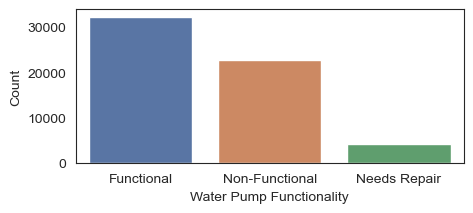

In [4]:
# Number of pumps in each category
train_df = pd.read_csv("project/data/train/features.csv", parse_dates = ['date_recorded' ])
labels = pd.read_csv("project/data/train/labels.csv")
train_df = pd.merge(train_df, labels, on='id')

sns.set_style("white")

train_df["status_group"].replace("functional", "Functional", inplace=True)
train_df["status_group"].replace("non functional", "Non-Functional", inplace=True)
train_df["status_group"].replace("functional needs repair", "Needs Repair", inplace=True)

value_counts = train_df["status_group"].value_counts().reset_index()
value_counts.columns = ["Functionality", "Count"]
fig, ax = plt.subplots(figsize=(5,2))

sns.set_palette("deep")
sns.barplot(data=value_counts, x="Functionality", y="Count", ax=ax)

plt.xlabel('Water Pump Functionality')
plt.ylabel('Count')
plt.title('')
plt.show()

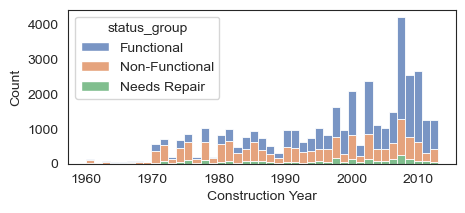

In [5]:
sns.set_style("white")


fig, ax = plt.subplots(figsize=(5,2))
figure = sns.histplot(data=train_df[train_df['construction_year'] != 0], ax=ax, x='construction_year', hue='status_group', fill='True', multiple='stack')
plt.xlabel('Construction Year')
plt.show()

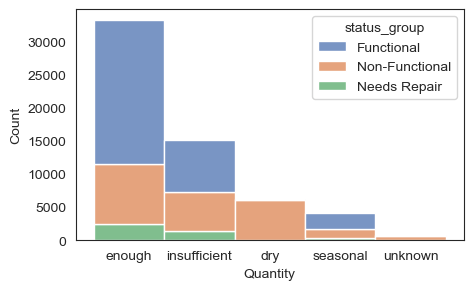

In [6]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(5,3))
figure = sns.histplot(train_df, x='quantity', hue='status_group', multiple='stack', ax=ax)
plt.xlabel('Quantity')
plt.show()

Text(0.5, 1.0, 'Percentage of missing values by column')

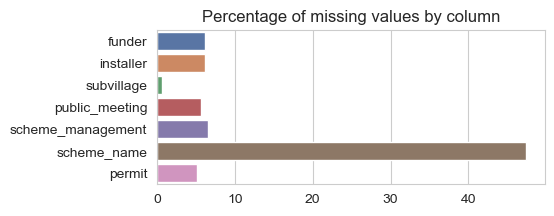

In [7]:
missing_counts = train_df.isnull().sum()
missing_proportions = missing_counts/len(train_df)*100

missing_proportions = missing_proportions.drop(index=missing_proportions[missing_proportions == 0].index)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(y=missing_proportions.index, x=missing_proportions.values, ax=ax)
plt.title("Percentage of missing values by column")


amount_tsh
gps_height
longitude
latitude
num_private
region_code
district_code
population


Text(0.5, 1.0, 'Percentage of values equal to zero by column')

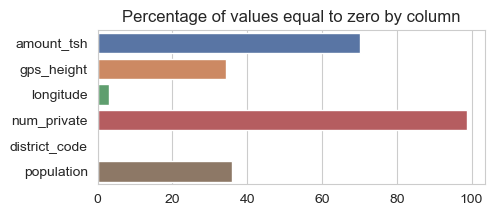

In [8]:
# Calculate the percentage of values equal to the mode for each column
percentages = {}
for column in train_df.select_dtypes(include=['int64', 'float64']).columns[1:-1]:
    print(column)
    zero_count = (train_df[column] == 0).sum()
    total_count = train_df[column].count()
    percentage = zero_count / total_count * 100
    if percentage > 0:
        percentages[column] = percentage
# Print the result
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(y=list(percentages.keys()), x=list(percentages.values()), ax=ax)
plt.title("Percentage of values equal to zero by column")

In [9]:
table = [
    ['Feature', 'Value'],
    ['amount_tsh', 'Ratio'],
    ['date_recorded', 'Interval'],
    ['funder', 'Nominal'],
    ['gps_height', 'Interval'],
    ['installer', 'Nominal'],
    ['longitude', 'Interval'],
    ['latitude', 'Interval'],
    ['wpt_name', 'Nominal'],
    ['basin', 'Nominal'],
    ['subvillage', 'Nominal'],
    ['region', 'Nominal'],
    ['region_code', 'Nominal'],
    ['district_code', 'Nominal'],
    ['lga', 'Nominal'],
    ['ward', 'Nominal'],
    ['population', 'Ratio'],
    ['public_meeting', 'Nominal'],
    ['recorded_by', 'Nominal'],
    ['scheme_management', 'Nominal'],
    ['scheme_name', 'Nominal'],
    ['permit', 'Nominal'],
    ['construction_year', 'Interval'],
    ['extraction_type', 'Nominal'],
    ['extraction_type_group', 'Nominal'],
    ['extraction_type_class', 'Nominal'],
    ['management', 'Nominal'],
    ['management_group', 'Nominal'],
    ['payment', 'Nominal'],
    ['payment_type', 'Nominal'],
    ['water_quality', 'Nominal'],
    ['quality_group', 'Nominal'],
    ['quantity', 'Nominal'],
    ['quantity_group', 'Nominal'],
    ['source', 'Nominal'],
    ['source_type', 'Nominal'],
    ['source_class', 'Nominal'],
    ['waterpoint_type', 'Nominal'],
    ['waterpoint_type_group', 'Nominal']
]

# Create the DataFrame
types_df = pd.DataFrame(table[1:], columns=table[0])

# Print the DataFrame
print(len(types_df[types_df["Value"] == "Nominal"]))
print(len(types_df[types_df["Value"] == "Interval"]))
print(len(types_df[types_df["Value"] == "Ordinal"]))
print(len(types_df[types_df["Value"] == "Ratio"]))

31
5
0
2


In [10]:
temp = train_df[train_df["quantity"] == "enough"]
temp["status_group"].value_counts()

Functional        21648
Non-Functional     9138
Needs Repair       2400
Name: status_group, dtype: int64

# Data Preprocessing

Includes imputation and deletion of bad features.

### Import Dependencies

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

### Load Data

In [12]:
train_base_df = pd.read_csv("project/data/train/features.csv", parse_dates = ['date_recorded' ],  na_values = [0, '0'])
labels = pd.read_csv("project/data/train/labels.csv")

test_df = pd.read_csv("project/data/test/test.csv", parse_dates = ['date_recorded' ],  na_values = [0, '0'])

# Merge features and labels files
train_df = pd.merge(labels, train_base_df, on='id')

print("Numerical columns: \n", train_df.select_dtypes(include=np.number).columns.tolist())

Numerical columns: 
 ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


In [13]:
train_df = pd.concat([train_df, test_df])
train_df.head(5)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,Lake Nyasa,Mnyusi B,Iringa,11,5.0,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,Lake Victoria,Nyamara,Mara,20,2.0,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,Pangani,Majengo,Manyara,21,4.0,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63.0,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,Lake Victoria,Kyanyamisa,Kagera,18,1.0,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## 1. Data Imputation

In [14]:
missing = round((train_df.isna().sum())/len(train_df)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          47.5
population           36.1
construction_year    35.0
gps_height           34.5
status_group         20.0
installer             7.4
funder                7.4
scheme_management     6.5
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
payment_type          0.0
dtype: float64

### Longitude Imputation

0 values are replaced by subvillage, ward, lga, or region's mean logitude values for each column. 

Solution by BrendaLoznik

In [15]:
train_df['longitude'].isna().sum()

2269

In [16]:
# train_df['longitude'].replace(0, np.nan, inplace=True)
#create mean longitude on the lowest granularity level (subvillage)
means_longitude_subvillage = train_df.groupby(['region', 'lga', 'ward', 'subvillage'])['longitude'].mean().reset_index()
means_longitude_subvillage = means_longitude_subvillage.rename(columns={"longitude": "longitude_imputed_subvillage"})

#ward level
means_longitude_ward = train_df.groupby(['region', 'lga', 'ward',])['longitude'].mean().reset_index()
means_longitude_ward = means_longitude_ward.rename(columns={"longitude": "longitude_imputed_ward"})

#lga level
means_longitude_lga = train_df.groupby(['region', 'lga'])['longitude'].mean().reset_index()
means_longitude_lga = means_longitude_lga .rename(columns={"longitude": "longitude_imputed_lga"})

#region level
means_longitude_region = train_df.groupby(['region'])['longitude'].mean().reset_index()
means_longitude_region = means_longitude_region.rename(columns={"longitude": "longitude_imputed_region"})
means_longitude_region.head()

,region,longitude_imputed_region
0,Arusha,36.554067
1,Dar es Salaam,39.212935
2,Dodoma,36.041964
3,Iringa,34.895921
4,Kagera,31.233092


In [17]:
#merge the aggregated dataframes as new columns to the original df
train_df= train_df.merge(means_longitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
train_df= train_df.merge(means_longitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
train_df = train_df.merge(means_longitude_lga, how = 'left', on = ['region', 'lga'])
train_df = train_df.merge(means_longitude_region, how = 'left', on = ['region'])

#select the right longitude level based on the availability of information
train_df['imputed_longitude'] = np.where(train_df['longitude'].isna(), train_df['longitude_imputed_subvillage'], train_df['longitude']) #if longitude is missing, impute it by the mean of the subvillage
train_df['imputed_longitude'] = np.where(train_df['imputed_longitude'].isna(), train_df['longitude_imputed_ward'], train_df['imputed_longitude']) #if subvillage mean is missing, impute it by the ward
train_df['imputed_longitude'] = np.where(train_df['imputed_longitude'].isna(), train_df['longitude_imputed_lga'], train_df['imputed_longitude'])
train_df['imputed_longitude'] = np.where(train_df['imputed_longitude'].isna(), train_df['longitude_imputed_region'], train_df['imputed_longitude'])

#drop redundant columns
train_df= train_df.drop(['longitude_imputed_subvillage','longitude_imputed_ward' , 'longitude_imputed_lga' , 'longitude_imputed_region', 'longitude'], axis=1)

In [18]:
train_df['imputed_longitude'].isna().sum()

0

### Latitude Imputation

0 values are replaced by subvillage, ward, lga, or region's mean latitude values for each column. 

Solution by Adam

In [19]:
df = train_df.copy()

In [20]:
df['latitude'].where(df["latitude"] <= -0.5, np.nan, inplace=True)
df['latitude'].isna().sum()

2269

In [21]:
#create mean latitude on the lowest granularity level (subvillage)
means_latitude_subvillage = df.groupby(['region', 'lga', 'ward', 'subvillage'])['latitude'].mean().reset_index()
means_latitude_subvillage = means_latitude_subvillage.rename(columns={"latitude": "latitude_imputed_subvillage"})

#ward level
means_latitude_ward = df.groupby(['region', 'lga', 'ward',])['latitude'].mean().reset_index()
means_latitude_ward = means_latitude_ward.rename(columns={"latitude": "latitude_imputed_ward"})

#lga level
means_latitude_lga = df.groupby(['region', 'lga'])['latitude'].mean().reset_index()
means_latitude_lga = means_latitude_lga .rename(columns={"latitude": "latitude_imputed_lga"})

#region level
means_latitude_region = df.groupby(['region'])['latitude'].mean().reset_index()
means_latitude_region = means_latitude_region.rename(columns={"latitude": "latitude_imputed_region"})
means_latitude_region.head()

,region,latitude_imputed_region
0,Arusha,-3.245240
1,Dar es Salaam,-6.908390
2,Dodoma,-5.940758
3,Iringa,-8.908507
4,Kagera,-1.960664


In [22]:
#merge the aggregated dataframes as new columns to the original df
df = df.merge(means_latitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
df = df.merge(means_latitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
df = df.merge(means_latitude_lga, how = 'left', on = ['region', 'lga'])
df = df.merge(means_latitude_region, how = 'left', on = ['region'])

#select the right latitude level based on the availability of information
df['imputed_latitude'] = np.where(df['latitude'].isna(), df['latitude_imputed_subvillage'], df['latitude']) #if longitude is missing, impute it by the mean of the subvillage
df['imputed_latitude'] = np.where(df['imputed_latitude'].isna(), df['latitude_imputed_ward'], df['imputed_latitude']) #if subvillage mean is missing, impute it by the ward
df['imputed_latitude'] = np.where(df['imputed_latitude'].isna(), df['latitude_imputed_lga'], df['imputed_latitude'])
df['imputed_latitude'] = np.where(df['imputed_latitude'].isna(), df['latitude_imputed_region'], df['imputed_latitude'])

#drop redundant columns
df= df.drop(['latitude_imputed_subvillage','latitude_imputed_ward' , 'latitude_imputed_lga' , 'latitude_imputed_region', 'latitude'], axis=1)

In [23]:
df['imputed_latitude'].isna().sum()

0

In [24]:
#function to create density plot
def impute_checker (feature, imputed_dataset, title):
  train_df[feature].plot(kind='kde', c='black')
  imputed_dataset[feature].plot(kind='kde', style = "--", c= '#66c2a5')
  labels = ['Original df', 'Imputed df']
  plt.legend(labels)
  plt.xlabel(feature)
  plt.title(title)
  plt.show()

In [25]:
if sw_impute_latitude:
    train_df = df

### Permit Imputation
Impute missing values with mode of similar records. `management_group` and `public_meeting` were used by BrendaLoznik.

In [26]:
#impute by mode
permit_mg_mode= train_df.groupby(['public_meeting', 'management_group'])['permit'].agg(pd.Series.mode).reset_index()
permit_mg_mode  = permit_mg_mode.rename(columns={"permit": "imputed_permit_mg"})
train_df = train_df.merge(permit_mg_mode, how = 'left', on = ['public_meeting', 'management_group'])

train_df['imputed_permit'] = np.where(train_df['permit'].isna(), train_df['imputed_permit_mg'], train_df['permit'])  #if permit is missing, replace it by the mode of public meeting - management group
train_df['imputed_permit']  = np.where(train_df['imputed_permit'] .isna(), train_df['permit'].mode(), train_df['imputed_permit'])  #if eitther public meeting or management group is missing, then use the mode of permit (True)

#drop original permit column
train_df = train_df.drop(['permit', 'imputed_permit_mg'], axis=1)

### Public Meeting Imputation
Simply impute public_meeting with the mode, as 90% of pumps have a TRUE value

Solution by BrendaLoznik extended by Filip

In [27]:
public_meeting_mode = train_df['public_meeting'].mode()[0]
train_df['public_meeting'] = train_df['public_meeting'].fillna(public_meeting_mode).astype(object)

### Scheme Management Imputation

Solution by BrendaLoznik

In [28]:
# it seems like a logical choice to impute missing scheme management values by the mode of the management - scheme-management as there is a lot of overlap here
check = train_df.groupby([  'management_group', 'scheme_management' , 'management'])['id'].count().reset_index()
check = check.sort_values('management')
check.head(10)

scheme_mode = train_df.groupby(['management'])['scheme_management'].agg(pd.Series.mode).reset_index()
scheme_mode = scheme_mode.rename(columns={"scheme_management": "imputed_scheme_management"})
scheme_mode 

#merge scheme_mode to original df and use it to replace missing values
train_df = train_df.merge(scheme_mode, how = 'left', on = [ 'management'])
train_df['imputed_scheme__management'] = np.where(train_df['scheme_management'].isna(), train_df['imputed_scheme_management'], train_df['scheme_management'])

#drop redundant columns
train_df= train_df.drop(['scheme_management', 'imputed_scheme_management'],axis=1)



### Installer

Solution 1 by BrendaLoznik

Solution 2 by Adam

In [29]:
# Solution 1

if not sw_use_new_installer_method:

    #I noticed a lot of variation in captialization, so I will first convert al entries to lowercase
    train_df['installer'] = train_df['installer'].str.lower()

    #plot top 10 installers
    installer = train_df.groupby('installer')['id'].count().reset_index()
    installer = installer.sort_values('id', ascending = False)
    installer.head(10)


    #there are a few categories in the top 60 most common categories whose naims look a lot alike and are probably typo's. We will merge them together
    train_df['installer'] = np.where( train_df['installer']=='gove', 'gover', train_df['installer'] )
    train_df['installer'] = np.where( train_df['installer']=='community', 'commu', train_df['installer'] )
    train_df['installer'] = np.where( train_df['installer']=='danid', 'danida', train_df['installer'] )

    installer = train_df.groupby('installer')['id'].count().reset_index()
    installer = installer.sort_values('id', ascending = False)
    installer.head(10)

    #I want to keep the most frequent installers and combine the rarer classes together. I have played around with the optimum number of installers to keep, and I decided on the top 150.

    #create list of top 150 installers
    top_installers = installer.nlargest(150, 'id')['installer'].unique()

    #replace funders that are not in top 10 with 'other'
    train_df['installer'] = np.where(train_df['installer'].isin(top_installers), train_df['installer'], 'other')


In [30]:
# Solution 2

if sw_use_new_installer_method:
    
    # Combine installers with less than 20 instances into "other"
    train_df['installer'] = train_df['installer'].str.lower()

    # Compute the value counts of the column
    value_counts = train_df['installer'].value_counts()

    # Identify values with fewer than X instances, including NaN values
    values_to_replace = value_counts[value_counts < 20].index.tolist()
    values_to_replace.append(np.nan)

    # Replace values with "other"
    train_df['installer'] = train_df['installer'].replace(values_to_replace, "other")

    # Perform target encoding
    # Calculate the percentage of 'functional' label for each unique value in the 'combined' column
    target_percentage = train_df.groupby('installer')['status_group'].apply(lambda x: (x == 'functional').mean())

    # Map the target percentage encoding values back to the 'combined' column
    train_df['installer'] = train_df['installer'].map(target_percentage)


### Funder

Solution 1 by BrendaLoznik

Solution 2 by Adam

In [31]:
# Solution 1

if not sw_use_new_funder_method:
    #set all entries to lowercase
    train_df['funder'] = train_df['funder'].str.lower()

    funder = train_df.groupby('funder')['id'].count().reset_index()
    funder = funder.sort_values('id', ascending = False)
    funder.head(10)

    #create list of top 150 funders
    top_funders = funder.nlargest(150, 'id')['funder'].unique()

    #replace funders that are not in top 150 with 'other'
    train_df['funder'] = np.where(train_df['funder'].isin(top_funders), train_df['funder'], 'other')

In [32]:
# Solution 2

if sw_use_new_funder_method:
    
    # Combine funders with less than 20 instances into "other"
    train_df['funder'] = train_df['funder'].str.lower()

    # Compute the value counts of the column
    value_counts = train_df['funder'].value_counts()

    # Identify values with fewer than X instances, including NaN values
    values_to_replace = value_counts[value_counts < 20].index.tolist()
    values_to_replace.append(np.nan)

    # Replace values with "other"
    train_df['funder'] = train_df['funder'].replace(values_to_replace, "other")
    print(train_df["funder"].unique().size)
    print(train_df["funder"].value_counts())

    # Perform target encoding
    # Calculate the percentage of 'functional' label for each unique value in the 'combined' column
    target_percentage = train_df.groupby('funder')['status_group'].apply(lambda x: (x == 'functional').mean())

    # Map the target percentage encoding values back to the 'combined' column
    train_df['funder'] = train_df['funder'].map(target_percentage)

315
government of tanzania    11299
other                     10706
danida                     3907
hesawa                     2782
rwssp                      1703
                          ...  
mkuyu                        20
tasaf/dmdd                   20
one un                       20
ubalozi wa marekani          20
rdc                          20
Name: funder, Length: 315, dtype: int64


### Construction Year Imputation

Since `extraction_type_group` is associated with `construction_year`, that will help to impute the values.

Solution by BrendaLoznik

In [33]:
#because of the wide spread of construction years, I don't want to impude by the overall mean
train_df['construction_year'].min(),  train_df['construction_year'].max() , train_df['construction_year'].mean()

#We can see that the mean construction year by extraction type group gives much more detailed information
mean_construction = train_df.groupby('extraction_type_group')['construction_year'].mean().reset_index()

#create train_df with the mean extraction year by extraction type group
mean_construction = train_df.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction  = mean_construction .rename(columns={"construction_year": "imputed_construction_year"})

#merge this train_df to the main train_df and replace missing values
train_df = train_df.merge(mean_construction, how =  'left', on =  'extraction_type_group')
train_df['construction_year_imputed'] = np.where(train_df['construction_year'].isna(), train_df['imputed_construction_year'], train_df['construction_year'] )

#drop redundant columns
train_df=train_df.drop(['imputed_construction_year', 'construction_year'], axis=1)

### GPS Height Imputation

**1: Solution by BrendaLoznik**

Replace values randomly within 1std of the mean, following a normal distribution.
This probably needs verifying/improving but it'll do for now.

**2: Filip's Solution**

Use SRTM (Shuttle Radar Topography Mission) data for Tanzania downloaded from [AfricaGeoPortal](https://rcmrd.africageoportal.com/datasets/rcmrd::tanzania-srtm-dem-30-meters/about). Although this is not used for the competition submissions (it is not allowed to use external data), this is a solution we would use if we were trying to solve the problem. 

In [34]:
# Solution 1

if not sw_gps_height_model_imput:
    #create mean on the lowest granularity level (subvillage)
    means_altitude_subvillage = train_df.groupby(['region', 'lga', 'ward', 'subvillage'])['gps_height'].mean().reset_index()#
    means_altitude_subvillage = means_altitude_subvillage.rename(columns={"gps_height": "gps_height_imputed_subvillage"})

    #ward level
    means_altitude_ward = train_df.groupby(['region', 'lga', 'ward',])['gps_height'].mean().reset_index()
    means_altitude_ward = means_altitude_ward.rename(columns={"gps_height": "gps_height_imputed_ward"})

    #lga level
    means_altitude_lga = train_df.groupby(['region', 'lga'])['gps_height'].mean().reset_index()
    means_altitude_lga = means_altitude_lga .rename(columns={"gps_height": "gps_height_imputed_lga"})

    #region level
    means_altitude_region = train_df.groupby(['region'])['gps_height'].mean().reset_index()
    means_altitude_region = means_altitude_region.rename(columns={"gps_height": "gps_height_imputed_region"})

    #region basin
    means_altitude_basin = train_df.groupby(['basin'])['gps_height'].mean().reset_index()
    means_altitude_basin = means_altitude_basin.rename(columns={"gps_height": "gps_height_imputed_basin"})

    #merge the aggregated dataframes as new columns to the original train_df
    train_df= train_df.merge(means_altitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
    train_df = train_df.merge(means_altitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
    train_df = train_df.merge(means_altitude_lga, how = 'left', on = ['region', 'lga'])
    train_df = train_df.merge(means_altitude_region, how = 'left', on = ['region'])
    train_df = train_df.merge(means_altitude_basin, how = 'left', on = ['basin'])

    #create final imputed longitude column
    train_df['imputed_gps_height'] = np.where(train_df['gps_height'].isna(), train_df['gps_height_imputed_subvillage'], train_df['gps_height']) #if longitude is missing, impute it by the mean of the subvillage
    train_df['imputed_gps_height'] = np.where(train_df['imputed_gps_height'].isna(), train_df['gps_height_imputed_ward'], train_df['imputed_gps_height']) #if subvillage mean is missing, impute it by the ward
    train_df['imputed_gps_height'] = np.where(train_df['imputed_gps_height'].isna(), train_df['gps_height_imputed_lga'], train_df['imputed_gps_height'])
    train_df['imputed_gps_height'] = np.where(train_df['imputed_gps_height'].isna(), train_df['gps_height_imputed_region'], train_df['imputed_gps_height'])
    train_df['imputed_gps_height'] = np.where(train_df['imputed_gps_height'].isna(), train_df['gps_height_imputed_basin'], train_df['imputed_gps_height'])

    #drop redundant columns
    train_df= train_df.drop(['gps_height_imputed_subvillage','gps_height_imputed_ward' , 'gps_height_imputed_lga' , 'gps_height_imputed_region', 'gps_height', 'gps_height_imputed_basin'], axis=1)


In [35]:
# Solution 2

import pandas as pd
import rasterio

if sw_gps_height_model_imput:

    df = train_df.copy()

    if sw_impute_latitude:
        latitude = 'imputed_latitude'
    else:
        latitude = 'latitude'

    # Specify the path to the SRTM file for Tanzania
    srtm_file = "Tanzania_SRTM30meters.tif"

    # Create a mask for rows where 'gps_height' is null
    null_height_mask = df['gps_height'].isna()

    # Retrieve the elevation values for rows with null 'gps_height'
    elevations = []

    with rasterio.open(srtm_file) as dataset:
        elevation_data = dataset.read(1)

        for idx, row in df[null_height_mask].iterrows():
            # Transform latitude and longitude to pixel coordinates
            row_idx, col_idx = dataset.index(row['imputed_longitude'], row[latitude])
            # Read the elevation value at the pixel coordinates
            elevation = elevation_data[row_idx, col_idx]
            elevations.append(elevation)

    # Assign the retrieved elevations to the 'gps_height' column
    df.loc[null_height_mask, 'gps_height'] = elevations


    train_df['imputed_gps_height'] = df['gps_height']
    train_df= train_df.drop('gps_height', axis=1)

### Population
Brenda's solution considers region-wide population average when not available, which is a poor indicator of population. Some readings also have very large population values, which skew the average. We use a binning approach to better represent population, with a "missing" bin where subvillage or ward population is unknown, as this itself is a decent predictor.

Solution by BrendaLoznik extended by Adam with considering "1" values as missing

In [36]:
# Convert 1 values to NaN by Filip
train_df["population"] = train_df["population"].replace(1, np.nan)

In [37]:
#create mean on the lowest granularity level (subvillage)
means_population_subvillage = train_df.groupby(['region', 'lga', 'ward', 'subvillage'])['population'].mean().reset_index()#
means_population_subvillage = means_population_subvillage.rename(columns={"population": "population_imputed_subvillage"})

#ward level
means_population_ward = train_df.groupby(['region', 'lga', 'ward',])['population'].mean().reset_index()
means_population_ward = means_population_ward.rename(columns={"population": "population_imputed_ward"})

#lga level
means_population_lga = train_df.groupby(['region', 'lga'])['population'].mean().reset_index()
means_population_lga = means_population_lga .rename(columns={"population": "population_imputed_lga"})

#region level
means_population_region = train_df.groupby(['region'])['population'].mean().reset_index()
means_population_region = means_population_region.rename(columns={"population": "population_imputed_region"})

#region basin
means_population_basin = train_df.groupby(['basin'])['population'].mean().reset_index()
means_population_basin = means_population_basin.rename(columns={"population": "population_imputed_basin"})

#merge the aggregated dataframes as new columns to the original df
train_df= train_df.merge(means_population_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
train_df = train_df.merge(means_population_ward, how = 'left', on = ['region', 'lga', 'ward'])
train_df = train_df.merge(means_population_lga, how = 'left', on = ['region', 'lga'])
train_df = train_df.merge(means_population_region, how = 'left', on = ['region'])
train_df = train_df.merge(means_population_basin, how = 'left', on = ['basin'])

#create final imputed longitude column
train_df['imputed_population'] = np.where(train_df['population'].isna(), train_df['population_imputed_subvillage'], train_df['population']) #if longitude is missing, impute it by the mean of the subvillage
train_df['imputed_population'] = np.where(train_df['imputed_population'].isna(), train_df['population_imputed_ward'], train_df['imputed_population']) #if subvillage mean is missing, impute it by the ward
train_df['imputed_population'] = np.where(train_df['imputed_population'].isna(), train_df['population_imputed_lga'], train_df['imputed_population'])
train_df['imputed_population'] = np.where(train_df['imputed_population'].isna(), train_df['population_imputed_region'], train_df['imputed_population'])
train_df['imputed_population'] = np.where(train_df['imputed_population'].isna(), train_df['population_imputed_basin'], train_df['imputed_population'])

#drop redundant columns
train_df= train_df.drop(['population_imputed_subvillage','population_imputed_ward' , 'population_imputed_lga' , 'population_imputed_region', 'population', 'population_imputed_basin'], axis=1)

### Correct data types

Solution by BrendaLoznik

In [38]:
#replace string to integer
train_df['public_meeting'] = train_df['public_meeting'].replace({True: 1, False: 0})
train_df['imputed_permit'] = train_df['imputed_permit'].replace({True: 1, False: 0})


#change to integer
train_df[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']] = train_df[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']].astype('int')

#change type to categorical
train_df[['region_code', 'district_code', 'num_private']] = train_df[['region_code', 'district_code', 'num_private']].astype('str')
train_df[[ 'num_private']] = train_df[[ 'num_private']].astype('str')

#remove decimal
train_df['district_code'] = train_df['district_code'].str.split(".").str[0]


In [39]:
#save cleaned df
train_df= train_df.rename(columns={"imputed_permit": "permit", "imputed_scheme__management": "scheme_management",
                    "imputed_gps_height": "gps_height", 'construction_year_imputed': 'construction_year', 
                   'imputed_population': 'population', 'imputed_longitude': 'longitude'}, errors="raise")

if sw_impute_latitude:
    train_df = train_df.rename(columns={'imputed_latitude': 'latitude'}, errors="raise")

train_df.to_csv("cleaned_df.csv")

In [40]:
train_df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'installer', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_name', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'longitude',
       'latitude', 'permit', 'scheme_management', 'construction_year',
       'gps_height', 'population'],
      dtype='object')

## 2. Feature Engineering

### recorded_age Feature
Create a feature recorded_age, which states the age (in years) of the pump at time of recording. Uses date_recorded and construction_year.

Solution by BrendaLoznik

In [41]:
#create age feature
train_df['recorded_year'] = pd.DatetimeIndex(train_df ['date_recorded']).year
train_df[ 'age'] = train_df['recorded_year'] - train_df['construction_year']
train_df = train_df.drop('recorded_year',axis=1)

### Recorded Season
The month in which the water pump's functionality is recorded may be important due to wet/dry seasons in Tanzania. Due to the poor distribution of recorded months, we group months into different season bins.

Solution by BrendaLoznik

In [42]:
train_df['month'] = pd.DatetimeIndex(train_df['date_recorded']).month

# season encoder
season_mapper = {1: 'short dry',2:'short dry', 3: 'long rain', 4: 'long rain', 5: 'long rain',6: 'long dry', 
                 7: 'long dry', 8: 'long dry', 9: 'long dry', 10: 'long dry', 11:'short rain', 12:'short rain'}
#.p feature values to scale
train_df['season'] = train_df['month'].replace(season_mapper)
# train_df = train_df.drop('month', axis=1)

### amount_tsh missing
Use a binary feature for whether amount_tsh is missing - this is a decent predictor of water pump status

Solution by BrendaLoznik

In [43]:
train_df['amount_tsh_missing'] = np.where( train_df['amount_tsh'].isna(), 1, 0)

### Region District

Solution by BrendaLoznik

In [44]:
train_df['region_district'] = train_df['region']+ "-" + train_df['district_code']

### Reduce Cardinality of Longitude/Latitude

Solution by BrendaLoznik extended by Filip

In [45]:
#two decimal places is 1.1 km accurate. This will provide enough information on the location. Using the full coordinate doesn't provide a lot of general information, but does result in high cardinality
train_df['longitude_rounded'] = round(train_df['longitude'], 2)
train_df['latitude_rounded'] = round(train_df['latitude'],2)

# train_df = train_df.drop('longitude', axis=1)
# train_df = train_df.drop('latitude', axis=1)

### Reduce Cardinality of GPS Height

We round the height to tens. 10 meters is enough accuracy.

Solution by Filip

In [46]:
if sw_gps_height_reduce_card:
    train_df['gps_height_rounded'] = train_df['gps_height'].round(-1).astype(int)

# train_df = train_df.drop('gps_height', axis=1)

### Extraction

Solution by BrendaLoznik

In [47]:
#i want to keep extraction type class and I will group the extraction type group en type together

#swn 80 and swn 81 become swn
#cemo + climax become other motorpump
# other -mkulima, other -play and walimi become other handpump

train_df['extraction_type_engineered'] = train_df['extraction_type']

swn = ['other - swn 81', 'swn80']
train_df['extraction_type_engineered'] =np.where(train_df['extraction_type_engineered'].isin(swn), 'swn',  train_df['extraction_type_engineered'])

other_handpump = ['other - mkulima/shinyanga', 'other - play pump', 'other - walimi']
train_df['extraction_type_engineered']=np.where(train_df['extraction_type_engineered'].isin(other_handpump), 'other handpump',  train_df['extraction_type_engineered'])

other_motorpump = ['cemo', 'climax']
train_df['extraction_type_engineered'] =np.where(train_df['extraction_type_engineered'].isin(other_motorpump), 'other motorpump',  train_df['extraction_type_engineered'])


### Extraction Type Class

There are very few datapoints with `wind-powered` and `rope pump`. Since `motorpump` has mostly similar label distribution to `wind-powered` and `rope pump` has mostly similar label distribution to `handpump`, we merge the former into the latter.

Solution by Filip

In [48]:
df = train_df.copy()
distribution_checker(df, 'extraction_type_class')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
extraction_type_class,,,,,
gravity,26780,45.1,59.9,30.0,10.1
handpump,16455,27.7,63.1,30.9,6.0
motorpump,2987,5.0,38.0,57.4,4.6
other,6430,10.8,16.0,80.8,3.2
rope pump,451,0.8,65.0,31.3,3.8
submersible,6179,10.4,53.9,42.0,4.1
wind-powered,117,0.2,42.7,51.3,6.0


In [49]:
# Merge 'wind-powered' class into 'motorpump'
df['extraction_type_class_engineered'] = df['extraction_type_class'].replace('wind-powered', 'motorpump')

# Merge 'rope pump' into 'handpump'
df['extraction_type_class_engineered'] = df['extraction_type_class_engineered'].replace('rope pump', 'handpump')

In [50]:
distribution_checker(df, 'extraction_type_class_engineered')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
extraction_type_class_engineered,,,,,
gravity,26780,45.1,59.9,30.0,10.1
handpump,16906,28.5,63.1,30.9,6.0
motorpump,3104,5.2,38.2,57.2,4.7
other,6430,10.8,16.0,80.8,3.2
submersible,6179,10.4,53.9,42.0,4.1


In [51]:
if sw_extraction_type_class_eng:
    train_df = df

### Autonomy

Solution by BrendaLoznik

In [52]:
#autonomous = government, VWC, town council ..... also water authority?, parastatal (=state company)? SWC?
#autonomous = WUA, WUG, board, trust, school
#private = private, company

non = ['VWC', 'Water authority', 'Parastatal', 'SWC']
autonomous = ['WUG', 'WUA', 'Water Board', 'Trust']
private = ['Company', 'Private operator']
other = ['None', 'Other']

train_df['scheme_management_engineered'] = train_df['scheme_management']
train_df.loc[train_df['scheme_management_engineered'].isin(non),'scheme_management_engineered']='non-autonomous'
train_df.loc[train_df['scheme_management_engineered'].isin(autonomous ),'scheme_management_engineered']='autonomous'
train_df.loc[train_df['scheme_management_engineered'].isin(private),'scheme_management_engineered']='private'
train_df.loc[train_df['scheme_management_engineered'].isin(other ),'scheme_management_engineered']='other'

### Combine rare features in `source`

Solution by BrendaLoznik

In [53]:
#keep source, but the rare classes will be put together
other = ['other',  'unknown']
train_df['source_engineered'] = train_df['source']
train_df['source_engineered'] = np.where(train_df['source_engineered']=='unknown', 'other', train_df['source_engineered'])

# train_df = train_df.drop('source', axis=1)

### Population

Adding bins to reduce cardinality

Solution by Filip

In [54]:
df = train_df.copy()

# bin the population column and assign labels
bins = [0, 100, 200, 500, 1000, 100000]
df['population_engineered'] = pd.cut(df['population'], bins=bins, labels=['very small', 'small', 'medium', 'large', 'very large']).astype('object')

# df = df.drop('population', axis=1)

distribution_checker(df, 'population_engineered')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
population_engineered,,,,,
large,11866,20.0,50.2,43.0,6.8
medium,24185,40.7,49.5,41.5,9.0
small,11444,19.3,60.7,33.2,6.2
very large,1928,3.2,54.3,40.7,5.1
very small,9976,16.8,63.5,31.2,5.3


In [55]:
if sw_population_bins:
    train_df = df

### Regional target encoding

Features `region`, `lga` are turned into a single variable and target encoded. Adding `ward`, `subvillage` to that would make cardinality increase cardinality too much, so they are dropped. The obtained feature has sequential property with higher values being associated with functional pumps.

Solution by Filip

In [56]:
df = train_df.copy()

In [57]:
# Combine the columns into a new column using the 'apply' method
df['combined'] = df[['region', 'lga']].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)

In [58]:
distribution_checker(df, 'combined')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
combined,,,,,
Arusha-Arusha Rural,1252,2.1,69.9,26.3,3.8
Arusha-Arusha Urban,63,0.1,66.7,22.2,11.1
Arusha-Karatu,326,0.5,96.9,2.8,0.3
Arusha-Longido,310,0.5,64.5,26.1,9.4
Arusha-Meru,1009,1.7,65.1,31.7,3.2
...,...,...,...,...,...
Tanga-Lushoto,694,1.2,62.4,29.1,8.5
Tanga-Mkinga,288,0.5,77.8,22.2,0.0
Tanga-Muheza,334,0.6,65.6,34.4,0.0


In [59]:
# Calculate the percentage of 'functional' label for each unique value in the 'combined' column
target_percentage = df.groupby('combined')['status_group'].apply(lambda x: (x == 'functional').mean())

# Map the target percentage encoding values back to the 'combined' column
df['region_encoded'] = df['combined'].map(target_percentage)

# Delete unnecessary columns
df = df.drop('combined', axis=1)

In [60]:
distribution_checker(df, 'region_encoded').sort_values('region_encoded').head(20)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
region_encoded,,,,,
0.000000,1,0.0,0.0,100.0,0.0
0.069333,300,0.5,8.7,86.3,5.0
0.149425,291,0.5,17.9,75.3,6.9
0.157895,71,0.1,21.1,67.6,11.3
0.158706,528,0.9,19.5,67.6,12.9
0.173333,305,0.5,21.3,77.7,1.0
0.177866,193,0.3,23.3,62.2,14.5
0.180812,231,0.4,21.2,65.8,13.0
0.188437,358,0.6,24.6,65.4,10.1


In [61]:
if sw_region_target_encoding:
    train_df = df

### Waterpoint Type
Some categories in Waterpoint Type have very few instances, primarily `dam` and `cattle trough`, so we merge these into other categories based on their similarity to other features, including `source_type` and `source_class`. The mode from this is selected.

Solution by Adam

In [62]:
train_df['waterpoint_type'].info()

<class 'pandas.core.series.Series'>
Int64Index: 74249 entries, 0 to 74248
Series name: waterpoint_type
Non-Null Count  Dtype 
--------------  ----- 
74249 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [63]:
if sw_waterpoint_type_adjust:
    train_df["waterpoint_type_engineered"] = train_df["waterpoint_type"]
    train_df["waterpoint_type_engineered"] = train_df["waterpoint_type_engineered"].replace(["dam"], [pd.NA])
    train_df["waterpoint_type_engineered"] = train_df["waterpoint_type_engineered"].replace(["cattle trough"], [pd.NA])

    modes = train_df.groupby(["source", "source_type", "source_class"])["waterpoint_type_engineered"].apply(lambda x: x.mode()[0]).reset_index()

    train_df["waterpoint_type_engineered"] = train_df["waterpoint_type_engineered"].fillna(df.merge(modes, on=['source', 'source_type', "source_class"], how='left')['waterpoint_type_engineered_y'])

### Pump Density Feature

Create `pump_density` feature based on the distance to 6 closest pumps (using `longitude` and `latitude`). `pump_density_engineered` is a binned version of that feature into 5 well-distributed density classes.

by Filip

In [64]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

if sw_pump_density:

    # Assuming you have a DataFrame called 'df' with 'longitude' and 'latitude' columns

    # Extract the 'longitude' and 'latitude' columns
    X = train_df[['longitude', 'latitude']].values

    # Specify the number of nearest neighbors, 'k'
    k = 6

    # Create a NearestNeighbors object and fit the data
    nn = NearestNeighbors(n_neighbors=k+1)  # k+1 to exclude the point itself
    nn.fit(X)

    # Find the distances and indices of the k nearest neighbors for each point
    distances, indices = nn.kneighbors(X)

    # Calculate the average distance to the k nearest neighbors for each point
    average_distances = np.mean(distances[:, 1:], axis=1)  # Exclude the distance to itself

    # Create a new column in the DataFrame with the average distances
    train_df['pump_density'] = abs(average_distances)
    
    # bin the population column and assign labels
    bins = [-0.001, 0.0025, 0.005, 0.0075, 0.01, 0.4]
    train_df['pump_density_engineered'] = pd.cut(train_df['pump_density'], bins=bins, labels=['very small', 'small', 'medium', 'large', 'very large']).astype('object')

    distribution_checker(train_df, 'pump_density_engineered')

## 3. Feature Preselection

Before using feature selection methods, we remove all the completely useless columns (established in EDA) while keeping both versions (pre-engineered and engineered) of all the engineered columns to perform feature selection on them.

In [65]:
full_df = train_df.copy()

In [66]:
if sw_brendas_selection:
    # #during EDA I already decided what features to keep and which ones to drop
    train_df = train_df.drop(['amount_tsh', 'date_recorded', 'wpt_name', 'num_private', 'subvillage', 'region',  'district_code', 'lga', 'ward', 'recorded_by', 'scheme_name', 'extraction_type_group', 'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group', 'construction_year'], axis=1)
else:
    train_df = train_df.drop(['amount_tsh', 'date_recorded', 'wpt_name', 'num_private', 'subvillage',  'district_code', 'recorded_by', 'scheme_name', 'payment', 'quantity_group', 'construction_year', 'ward'], axis=1)

## 4. Oversampling

by Filip

In [67]:
from imblearn.over_sampling import SMOTENC

df = train_df[train_df['status_group'].notnull()].copy()

# Separate the features and the target variable
X = df.drop('status_group', axis=1)
y = df['status_group']

# Identify the index of the 'functional_needs_repair' class
repair_index = y[y == 'functional needs repair'].index

In [68]:
# Change the type of numerical values that should be treated as categories

train_df['public_meeting'] = train_df['public_meeting'].astype(object)
train_df['permit'] = train_df['permit'].astype(object)
train_df['month'] = train_df['month'].astype(object)
train_df['amount_tsh_missing'] = train_df['amount_tsh_missing'].astype(object)

In [69]:
# categorical_cols = [col for col in X.columns if len(X[col].unique()) < 200]
categorical_cols = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

# Convert numerical columns to object type
for col in categorical_cols:
        X[col] = X[col].astype(object)

# Create a categorical mask
cat_mask = [True if col in categorical_cols else False for col in X.columns]

In [70]:
missing = round((train_df.isna().sum())/len(train_df)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

status_group                  20.0
id                             0.0
longitude_rounded              0.0
permit                         0.0
scheme_management              0.0
gps_height                     0.0
population                     0.0
age                            0.0
month                          0.0
season                         0.0
amount_tsh_missing             0.0
region_district                0.0
latitude_rounded               0.0
gps_height_rounded             0.0
extraction_type_engineered     0.0
dtype: float64

In [71]:
# Apply SMOTE-NC to oversample the 'functional_needs_repair' class
smotenc = SMOTENC(categorical_features=cat_mask, k_neighbors=5, random_state=42, sampling_strategy={'functional needs repair': 7000})
X_resampled, y_resampled = smotenc.fit_resample(X, y)

In [72]:
# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['status_group'] = y_resampled

df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62082 entries, 0 to 62081
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                62082 non-null  int64  
 1   funder                            62082 non-null  float64
 2   installer                         62082 non-null  float64
 3   basin                             62082 non-null  object 
 4   region                            62082 non-null  object 
 5   region_code                       62082 non-null  object 
 6   lga                               62082 non-null  object 
 7   public_meeting                    62082 non-null  int64  
 8   extraction_type                   62082 non-null  object 
 9   extraction_type_group             62082 non-null  object 
 10  extraction_type_class             62082 non-null  object 
 11  management                        62082 non-null  object 
 12  mana

In [73]:
missing = round((train_df.isna().sum())/len(train_df)*100,1)
missing = missing.sort_values(ascending = False)

for col in train_df.columns:
    print(col, len(train_df[col].unique()), missing[col], train_df[col].dtype)

id 74249 0.0 int64
status_group 4 20.0 object
funder 272 0.0 float64
installer 243 0.0 float64
basin 9 0.0 object
region 21 0.0 object
region_code 27 0.0 object
lga 125 0.0 object
public_meeting 2 0.0 object
extraction_type 18 0.0 object
extraction_type_group 13 0.0 object
extraction_type_class 7 0.0 object
management 12 0.0 object
management_group 5 0.0 object
payment_type 7 0.0 object
water_quality 8 0.0 object
quality_group 6 0.0 object
quantity 5 0.0 object
source 10 0.0 object
source_type 7 0.0 object
source_class 3 0.0 object
waterpoint_type 7 0.0 object
waterpoint_type_group 6 0.0 object
longitude 71879 0.0 float64
latitude 71878 0.0 float64
permit 2 0.0 object
scheme_management 12 0.0 object
gps_height 2456 0.0 int64
population 1216 0.0 int64
age 60 0.0 int64
month 12 0.0 object
season 4 0.0 object
amount_tsh_missing 2 0.0 object
region_district 132 0.0 object
longitude_rounded 1074 0.0 float64
latitude_rounded 1057 0.0 float64
gps_height_rounded 270 0.0 int64
extraction_type_e

In [74]:
if sw_oversampling:
    train_df = pd.concat([df_resampled, train_df[train_df['status_group'].isna()]], ignore_index=True)

In [75]:
missing = round((train_df.isna().sum())/len(train_df)*100,1)
missing = missing.sort_values(ascending = False)

for col in train_df.columns:
    print(col, len(train_df[col].unique()), missing[col], train_df[col].dtype)

id 74249 0.0 int64
status_group 4 20.0 object
funder 272 0.0 float64
installer 243 0.0 float64
basin 9 0.0 object
region 21 0.0 object
region_code 27 0.0 object
lga 125 0.0 object
public_meeting 2 0.0 object
extraction_type 18 0.0 object
extraction_type_group 13 0.0 object
extraction_type_class 7 0.0 object
management 12 0.0 object
management_group 5 0.0 object
payment_type 7 0.0 object
water_quality 8 0.0 object
quality_group 6 0.0 object
quantity 5 0.0 object
source 10 0.0 object
source_type 7 0.0 object
source_class 3 0.0 object
waterpoint_type 7 0.0 object
waterpoint_type_group 6 0.0 object
longitude 71879 0.0 float64
latitude 71878 0.0 float64
permit 2 0.0 object
scheme_management 12 0.0 object
gps_height 2456 0.0 int64
population 1216 0.0 int64
age 60 0.0 int64
month 12 0.0 object
season 4 0.0 object
amount_tsh_missing 2 0.0 object
region_district 132 0.0 object
longitude_rounded 1074 0.0 float64
latitude_rounded 1057 0.0 float64
gps_height_rounded 270 0.0 int64
extraction_type_e

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74249 entries, 0 to 74248
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                74249 non-null  int64  
 1   status_group                      59399 non-null  object 
 2   funder                            74249 non-null  float64
 3   installer                         74249 non-null  float64
 4   basin                             74249 non-null  object 
 5   region                            74249 non-null  object 
 6   region_code                       74249 non-null  object 
 7   lga                               74249 non-null  object 
 8   public_meeting                    74249 non-null  object 
 9   extraction_type                   74249 non-null  object 
 10  extraction_type_group             74249 non-null  object 
 11  extraction_type_class             74249 non-null  object 
 12  mana

## 5. Encoding

by BrendaLoznik

In [77]:
# #define train and test 
# train_set = train_df[train_df ["id"].isin(train_base_df["id"])]
# test_set =  train_df[train_df  ["id"].isin(test_df["id"])]

train_set = train_df[train_df['status_group'].notna()]
test_set =  train_df[train_df['status_group'].isna()]

In [78]:
X = train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

In [79]:
X.columns

Index(['funder', 'installer', 'basin', 'region', 'region_code', 'lga',
       'public_meeting', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'longitude', 'latitude', 'permit',
       'scheme_management', 'gps_height', 'population', 'age', 'month',
       'season', 'amount_tsh_missing', 'region_district', 'longitude_rounded',
       'latitude_rounded', 'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'scheme_management_engineered',
       'source_engineered', 'population_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density',
       'pump_density_engineered'],
      dtype='object')

In [80]:
categorical_cols = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

In [81]:
# Encode Categorical Columns 
for col in categorical_cols:
  le = LabelEncoder()
  train_set[col] = le.fit_transform(train_set[col])
  test_set[col] = le.transform(test_set[col])


/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/3744793663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[col] = le.fit_transform(train_set[col])
/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/3744793663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[col] = le.transform(test_set[col])
/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/3744793663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [82]:
#merge the encoded train and test sets together
train_df = train_set.append(test_set)

/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/3238694098.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_set.append(test_set)


## 6. Feature Selection

In [83]:
#basic libraries
import numpy as np
from numpy import mean, std
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from fcbf import fcbf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
train_df.to_csv("preselection_df.csv")
train_df.columns

Index(['id', 'status_group', 'funder', 'installer', 'basin', 'region',
       'region_code', 'lga', 'public_meeting', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'longitude', 'latitude', 'permit',
       'scheme_management', 'gps_height', 'population', 'age', 'month',
       'season', 'amount_tsh_missing', 'region_district', 'longitude_rounded',
       'latitude_rounded', 'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'scheme_management_engineered',
       'source_engineered', 'population_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density',
       'pump_density_engineered'],
      dtype='object')

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74249 entries, 0 to 74248
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                74249 non-null  int64  
 1   status_group                      59399 non-null  object 
 2   funder                            74249 non-null  float64
 3   installer                         74249 non-null  float64
 4   basin                             74249 non-null  int64  
 5   region                            74249 non-null  int64  
 6   region_code                       74249 non-null  int64  
 7   lga                               74249 non-null  int64  
 8   public_meeting                    74249 non-null  int64  
 9   extraction_type                   74249 non-null  int64  
 10  extraction_type_group             74249 non-null  int64  
 11  extraction_type_class             74249 non-null  int64  
 12  mana

In [86]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

In [87]:
#define train and test 
train_set = train_df[train_df['status_group'].notna()].copy()
test_set = train_df[train_df['status_group'].isna()].copy()

#fully encoded and imputed dataframe
train_set.head()

,id,status_group,funder,installer,basin,region,region_code,lga,public_meeting,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude,latitude,permit,scheme_management,gps_height,population,age,month,season,amount_tsh_missing,region_district,longitude_rounded,latitude_rounded,gps_height_rounded,extraction_type_engineered,extraction_type_class_engineered,scheme_management_engineered,source_engineered,population_engineered,region_encoded,waterpoint_type_engineered,pump_density,pump_density_engineered
0,69572,functional,0.672619,0.478992,1,3,2,51,1,3,1,0,7,4,0,6,2,1,8,6,0,1,1,34.938093,-9.856322,0,7,1390,109,12,2,1,0,20,34.94,-9.86,1390,1,0,1,8,2,0.636099,0,0.003084,2
1,8776,functional,0.671875,0.660000,4,9,12,103,1,3,1,0,11,4,2,6,2,2,5,3,1,1,1,34.698766,-2.147466,1,2,1399,280,3,2,1,1,55,34.70,-2.15,1400,1,0,2,5,1,0.468508,0,0.006428,1
2,34310,functional,0.459462,0.504037,5,8,13,108,1,3,1,0,7,4,5,6,2,1,0,1,1,2,1,37.460664,-3.821329,1,7,686,250,4,1,2,0,52,37.46,-3.82,690,1,0,1,0,1,0.481183,1,0.003484,2
3,67743,non functional,0.453172,0.413907,7,12,25,87,1,14,10,5,7,4,2,6,2,0,3,0,0,2,1,38.486161,-11.155298,1,7,263,58,27,0,2,1,76,38.49,-11.16,260,11,4,1,3,4,0.197183,1,0.001452,4
4,19728,functional,0.459462,0.443787,4,4,9,26,1,3,1,0,1,1,2,6,2,3,5,3,1,1,1,31.130847,-1.825359,1,2,1328,544,15,6,0,1,22,31.13,-1.83,1330,1,0,2,5,0,0.422958,0,0.012428,3


BrendaLoznik's custom functions

In [88]:
#calculate variance inflation factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [89]:
def feature_importances (model, title):
    model.fit(X, y)
    features= X.columns
    importances = np.round(model.feature_importances_,3) 
    indices = np.argsort(importances)
    num_features = len(features)
    fig, ax = plt.subplots(figsize=(10,10)) 
    plt.barh(range(num_features), importances[indices[-num_features:]],  align='center', color =  '#66c2a5')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance' + title)

plt.show()

### Our solutions

**Iterative Cross-Validated Engineered Features Evaluation (ICVEFE)**

and

**Iterative Cross-Validated Optional Features Evaluation (ICVOFE)**

We compare the performance of non-engineered and engineered features. Additionally, we check the performance improvement for each of the optional features, which are suspected to be less useful based on EDA.

Solutions by Filip

In [90]:
def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))  # Recursively flatten sublists
        else:
            flattened.append(item)
    return flattened

In [91]:
engineered_cols_dict = {
    'region': 'region_encoded',
    'longitude': 'longitude_rounded',
    'latitude': 'latitude_rounded',
    'month': 'season',
    'gps_height': 'gps_height_rounded',
    'extraction_type': 'extraction_type_engineered',
    'extraction_type_class': 'extraction_type_class_engineered',
    'scheme_management': 'scheme_management_engineered',
    'source': 'source_engineered',
    'population': 'population_engineered',
    'waterpoint_type': 'waterpoint_type_engineered',
    'pump_density': 'pump_density_engineered'
}

optional = [
    'waterpoint_type_group',
    'source_class',
    'quality_group',
    'management',
    'management_group',
    'extraction_type_group'
]

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

In [92]:
if sw_fia_engineered:

    #define X and y varaibles
    X = train_set.drop(['status_group', 'id'],axis=1)
    y = train_set['status_group']

    # drop the optional features
    X = X.drop(optional, axis=1)

    # leave only non-engineered features
    for neng_col in engineered_cols_dict:
        X = X.drop(engineered_cols_dict[neng_col], axis=1)

    # compare the accuracy with random forest
    cols_todrop = []

    # perform cross-validated modelling using the non-engineered feature
    n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    base_score = mean(n_scores)

    for neng_col in engineered_cols_dict:
        eng_col = engineered_cols_dict[neng_col]

        # perform cross-validated modelling using the engineered feature
        if neng_col == 'region':
            neng_col = ['region', 'lga']
        n_scores = cross_val_score(rf, pd.merge(X.drop(neng_col, axis=1), train_df[eng_col], left_index=True, right_index=True), y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        eng_score = mean(n_scores)

        print(eng_col, "accuracy:", eng_score)
        print(neng_col, "accuracy:", base_score)

        # store the columns that perform worse to drop them later
        if eng_score > base_score:
            print(eng_col, "WINS")
            cols_todrop.append(neng_col)
        else:
            print(neng_col, "WINS")
            cols_todrop.append(eng_col)

    # Drop the columns that performed worse
    cols_todrop = flatten_list(cols_todrop)
    train_df = train_df.drop(cols_todrop, axis=1)

    cols_todrop

region_encoded accuracy: 0.8086163254592282
['region', 'lga'] accuracy: 0.807454638431234
region_encoded WINS
longitude_rounded accuracy: 0.8054512742625219
longitude accuracy: 0.807454638431234
longitude WINS
latitude_rounded accuracy: 0.808229077552196
latitude accuracy: 0.807454638431234
latitude_rounded WINS
season accuracy: 0.8079260614224412
month accuracy: 0.807454638431234
season WINS
gps_height_rounded accuracy: 0.8077408762372562
gps_height accuracy: 0.807454638431234
gps_height_rounded WINS


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


extraction_type_engineered accuracy: 0.8083300904878612
extraction_type accuracy: 0.807454638431234
extraction_type_engineered WINS
extraction_type_class_engineered accuracy: 0.8074714819520343
extraction_type_class accuracy: 0.807454638431234
extraction_type_class_engineered WINS
scheme_management_engineered accuracy: 0.8071179295905682
scheme_management accuracy: 0.807454638431234
scheme_management WINS
source_engineered accuracy: 0.8074041050341775
source accuracy: 0.807454638431234
source WINS
population_engineered accuracy: 0.8068654468578698
population accuracy: 0.807454638431234
population WINS
waterpoint_type_engineered accuracy: 0.8079092008937101
waterpoint_type accuracy: 0.807454638431234
waterpoint_type_engineered WINS
pump_density_engineered accuracy: 0.8050471856693443
pump_density accuracy: 0.807454638431234
pump_density WINS


In [93]:
if sw_fia_optional:

    #define train and test 
    train_set = train_df[train_df['status_group'].notna()]
    test_set = train_df[train_df['status_group'].isna()]

    #define X and y varaibles
    X = train_set.drop(['status_group', 'id'],axis=1)
    y = train_set['status_group']

    X = X.drop(optional, axis=1)

    # perform cross-validated modelling without optional feature
    n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    base_score = mean(n_scores)

    cols_todrop = []

    # compare the accuracy using random forest
    for col in optional:

        # perform cross-validated modelling using the optional feature
        n_scores = cross_val_score(rf, pd.merge(X, train_df[col], left_index=True, right_index=True), y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        col_score = mean(n_scores)

        print(col, "accuracy:", col_score)
        print("without", col, "accuracy:", base_score)

        # store the columns that perform worse to drop them later
        if col_score > base_score:
            print(col, "WINS")
        else:
            print("leaving", col, "WINS")
            cols_todrop.append(col)

    train_df = train_df.drop(cols_todrop, axis=1)
    cols_todrop

In [94]:
# train_df = train_df[['id', 'funder', 'installer', 'basin', 'region', 'region_code', 'lga',
#        'public_meeting', 'extraction_type', 'extraction_type_class',
#        'payment_type', 'water_quality', 'quantity', 'source', 'source_type',
#        'waterpoint_type', 'longitude', 'latitude', 'permit',
#        'scheme_management', 'gps_height', 'population', 'age', 'month',
#        'amount_tsh_missing', 'region_district', 'pump_density',
#        'status_group']]

In [95]:
train_df.columns

Index(['id', 'status_group', 'funder', 'installer', 'basin', 'region_code',
       'public_meeting', 'extraction_type_group', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type_group', 'longitude', 'permit', 'scheme_management',
       'population', 'age', 'season', 'amount_tsh_missing', 'region_district',
       'latitude_rounded', 'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density'],
      dtype='object')

### Fast Correlation-Based Filter
Originally proposed in https://asu.pure.elsevier.com/en/publications/feature-selection-for-high-dimensional-data-a-fast-correlation-ba

To the best of our knowledge, no other methods have utilised FCBF in this dataset.

Solution by Adam

In [96]:
if(sw_fcbf_feature_selection):
    features = train_df.drop(["status_group", "id"], axis=1)
    labels = train_df["status_group"]
    
    relevant_features, irrelevant_features, correlations = fcbf(features, labels, su_threshold=0.05, base=2)
    print('relevant_features:', relevant_features, '(count:', len(relevant_features), ')')
    print('irrelevant_features:', irrelevant_features, '(count:', len(irrelevant_features), ')')
    print('correlations:', correlations)

    train_df = train_df.drop(irrelevant_features, axis=1)

In [97]:
train_df.to_csv("final_df.csv")

### Solutions by BrendaLoznik

In [98]:
#define train and test 
train_set = train_df[train_df['status_group'].notna()]
test_set = train_df[train_df['status_group'].isna()]

Pearson's correlation

/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/516460297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mean = train_set.corr(method = 'pearson')


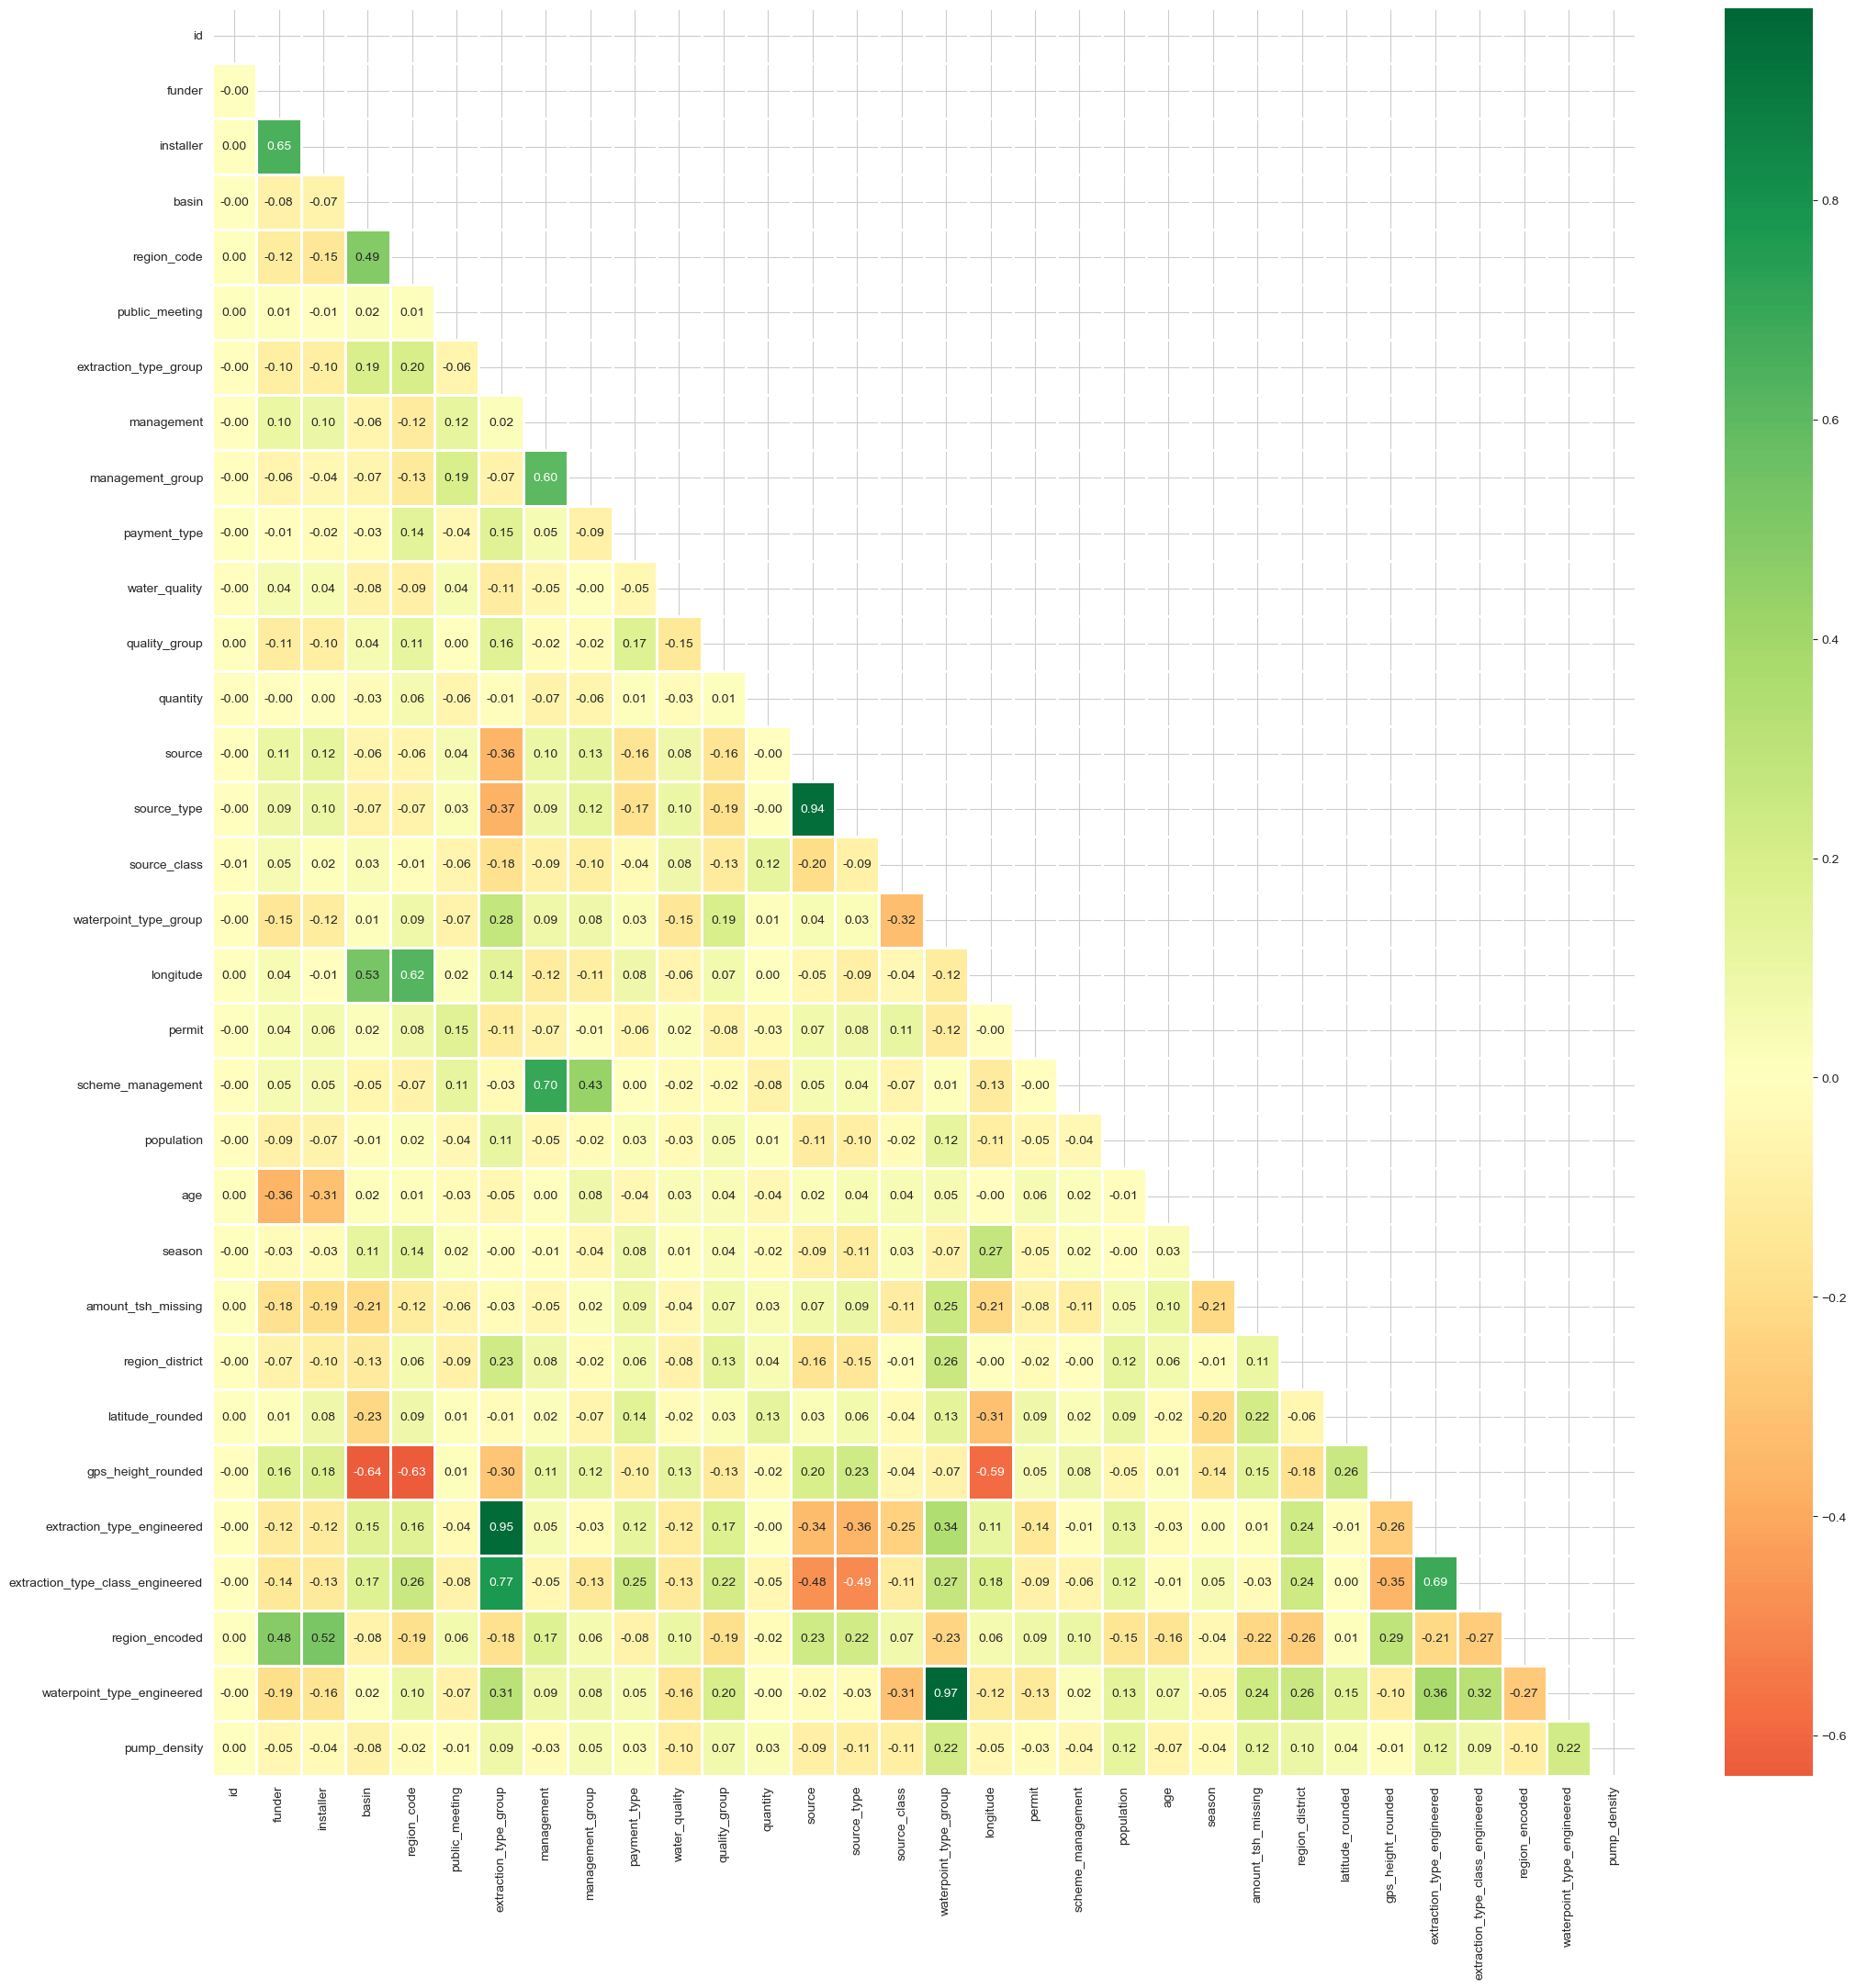

In [99]:
# Create the correlation matrix
corr_mean = train_set.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(25,25)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels())
plt.show()

Multicolllinearity

In [100]:
le = LabelEncoder()
train_set['status_group'] = le.fit_transform(train_set['status_group'])

/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/3127022900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['status_group'] = le.fit_transform(train_set['status_group'])


In [101]:
vif_df =calc_vif(train_set)
vif_df = vif_df.sort_values('VIF', ascending = False)
vif_df.head(10)

,variables,VIF
18,longitude,189.521358
14,source,112.885147
17,waterpoint_type_group,76.978701
15,source_type,48.288737
31,waterpoint_type_engineered,43.351903
7,extraction_type_group,41.708103
11,water_quality,41.392730
8,management,39.601661
28,extraction_type_engineered,33.064219
20,scheme_management,31.189535


Feature Importance

In [102]:
# #define X and y varaibles
# X = train_set.drop(['status_group', 'id'],axis=1)
# y = train_set['status_group']

# #instantiate model and cross_validation
# rf = RandomForestClassifier(random_state =42)
# cv = KFold(n_splits=10, shuffle = True,  random_state=1)

# #perform cross-validaton
# n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# #plot feature importance
# feature_importances (rf, " full feature set")

VIF

In [103]:
# FIND OUT WHICH FEATURES HAVE HIGH VIF FIRST

# #define X and y varaibles
# X = train_set[['amount_tsh', 'date_recorded', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'lga', 'ward', 'recorded_by', 'scheme_name', 'extraction_type_class',
#               'payment', 'quantity', 'source_class', 'waterpoint_type_group', 'permit', 'population']]
# y = train_set['status_group']

# #instantiate model and cross_validation
# rf = RandomForestClassifier(random_state =42)
# cv = KFold(n_splits=10, shuffle = True,  random_state=1)

# #perform cross-validaton
# n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# #plot feature importance
# feature_importances (rf, " VIF feature set")

RFECV

In [104]:
train_set.columns

Index(['id', 'status_group', 'funder', 'installer', 'basin', 'region_code',
       'public_meeting', 'extraction_type_group', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type_group', 'longitude', 'permit', 'scheme_management',
       'population', 'age', 'season', 'amount_tsh_missing', 'region_district',
       'latitude_rounded', 'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density'],
      dtype='object')

In [105]:
if sw_rfecv:

    #define X and y varaibles
    X = train_set.drop(['status_group', 'id'], axis=1)
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42)

    rf = RandomForestClassifier(random_state =42)
    rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='accuracy', verbose = 1,  min_features_to_select=20) 

    #transform
    rfecv.fit(X_train, y_train)
    rfecv.transform(X_train)

    #predict
    y_pred = rfecv.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.3f' % (accuracy))

Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 fe

In [106]:
train_df.columns

Index(['id', 'status_group', 'funder', 'installer', 'basin', 'region_code',
       'public_meeting', 'extraction_type_group', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type_group', 'longitude', 'permit', 'scheme_management',
       'population', 'age', 'season', 'amount_tsh_missing', 'region_district',
       'latitude_rounded', 'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density'],
      dtype='object')

In [107]:
if sw_rfecv:

    #let's check what features were dropped at each iteration
    support = rfecv.support_.tolist()
    ranking = rfecv.ranking_.tolist()
    columns = X_train.columns.tolist()

    d = {'Feature':columns,'Support': support, 'Ranking': ranking}  
    score_df = pd.DataFrame(d)
    score_df  = score_df .sort_values( 'Ranking', ascending = True)
    print(score_df)

    cols_todrop = score_df[score_df['Support'] == False]['Feature'].tolist()
    train_df = train_df.drop(cols_todrop, axis=1)

    print(cols_todrop)

                             Feature  Support  Ranking
0                             funder     True        1
28                    region_encoded     True        1
27  extraction_type_class_engineered     True        1
26        extraction_type_engineered     True        1
25                gps_height_rounded     True        1
24                  latitude_rounded     True        1
23                   region_district     True        1
22                amount_tsh_missing     True        1
20                               age     True        1
19                        population     True        1
16                         longitude     True        1
29        waterpoint_type_engineered     True        1
15             waterpoint_type_group     True        1
30                      pump_density     True        1
1                          installer     True        1
11                          quantity     True        1
10                     quality_group     True        1
3         

In [108]:
train_df.columns

Index(['id', 'status_group', 'funder', 'installer', 'region_code',
       'extraction_type_group', 'management', 'payment_type', 'quality_group',
       'quantity', 'source', 'waterpoint_type_group', 'longitude',
       'population', 'age', 'amount_tsh_missing', 'region_district',
       'latitude_rounded', 'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density'],
      dtype='object')

# Feature Normalisation

by Adam

### Min-Max Scaling

In [109]:
if sw_minmax_scale:
    features = train_df.drop(["status_group", "id"], axis=1)
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to your data
    scaler.fit(features)

    # Perform min-max scaling on your data
    train_df[features.columns] = scaler.transform(features)

### Z-score Normalisation

In [110]:
if(sw_zscore_scale):
    features = train_df.drop(["status_group", "id"], axis=1)

    scaler = StandardScaler()
    scaler.fit(features)
    train_df[features.columns] = scaler.transform(features)


### Custom Scaling
Manually combine Min-Max scaling, Z-score normalisation and Robust scaling on a feature-by-feature basis.

In [111]:
if(sw_custom_scale):
    features = train_df.drop(["status_group", "id"], axis=1)
    
    print(features.columns)
    # Z Score
    zscoreColumns = ["age", "pump_density"]

    # MinMax
    minmaxColumns = ["latitude", "longitude", "gps_height"]

    # Normalisation for when there's outliers
    robustColumns = ["population"]

    mmScaler = MinMaxScaler()
    zScaler = StandardScaler()
    rScaler = RobustScaler()

    zscoreColumns = [col for col in zscoreColumns if col in train_df.columns]
    minmaxColumns = [col for col in minmaxColumns if col in train_df.columns]
    robustColumns = [col for col in robustColumns if col in train_df.columns]

    # Fit the scalers to data
    if len(minmaxColumns) > 0: mmScaler.fit(train_df[minmaxColumns])
    if len(zscoreColumns) > 0:zScaler.fit(train_df[zscoreColumns])
    if len(robustColumns) > 0:rScaler.fit(train_df[robustColumns])

    # Apply scaling to each column group
    if len(zscoreColumns) > 0: train_df[zscoreColumns] = zScaler.transform(train_df[zscoreColumns])
    if len(minmaxColumns) > 0: train_df[minmaxColumns] = mmScaler.transform(train_df[minmaxColumns])
    if len(robustColumns) > 0: train_df[robustColumns] = rScaler.transform(train_df[robustColumns])

Index(['funder', 'installer', 'region_code', 'extraction_type_group',
       'management', 'payment_type', 'quality_group', 'quantity', 'source',
       'waterpoint_type_group', 'longitude', 'population', 'age',
       'amount_tsh_missing', 'region_district', 'latitude_rounded',
       'gps_height_rounded', 'extraction_type_engineered',
       'extraction_type_class_engineered', 'region_encoded',
       'waterpoint_type_engineered', 'pump_density'],
      dtype='object')


# Dimensionality Reduction

by Adam

### PCA

In [112]:
if sw_pca:
    # Number of components to use
    pca_num_components = 8

    features = train_df[train_df["status_group"].notnull()]
    labels = features["status_group"]
    features = features.drop(["status_group", "id"], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(features, labels)

    bestScore = 0
    bestIdx = 0
    for i in range(4, len(features.columns)):
        
        # Apply PCA to all columns
        pca = PCA(n_components=i)
        pcaModel = pca.fit(X_train)
        pca_train = pcaModel.transform(X_train)
        pca_test = pcaModel.transform(X_test)
        pca_train = pd.DataFrame(pca_train)
        pca_test = pd.DataFrame(pca_test)

        # Test PCA output on random forests classifier
        rf = RandomForestClassifier(random_state=42)

        rf = rf.fit(pca_train, y_train)
        preds = rf.predict(pca_test)


        accuracy = accuracy_score(preds, y_test)
        print(i)
        print('Accuracy: %.3f' % (accuracy))
        if accuracy > bestScore:
            bestScore = accuracy
            bestIdx = i
    
    pca = PCA(n_components=bestIdx)
    pca_data = pd.DataFrame(pca.fit_transform(train_df.drop(["status_group", "id"], axis=1)))
    train_df = pd.concat([pca_data, train_df[["status_group", "id"]]])

### LDA

In [113]:
if(sw_lda):

    features = train_df.drop(["status_group", "id"], axis=1)
    train_features = features[train_df["status_group"].notna()]

    test_features = features[train_df["status_group"].isna()]

    train_labels = train_df["status_group"].dropna()
    lda = LinearDiscriminantAnalysis()

    # Fit the LDA model to the scaled features and target variable
    lda = lda.fit(train_features, train_labels)

    # Transform the features to the LDA space
    train_out = lda.transform(train_features)
    test_out = lda.transform(test_features)

    train_lda = pd.DataFrame(train_out, columns=['out_1', 'out_2'])
    test_lda = pd.DataFrame(train_out, columns=['out_1', 'out_2'])

    lda_df = pd.concat([train_lda, test_lda], axis=0)

    train_df = pd.concat([lda_df, train_df[["id", "status_group"]]], axis=1)

### Truncated SVD

In [114]:
if(sw_tsvd):
    from sklearn import decomposition
    tsvd_num_components = 8

    features = train_df.drop(["status_group", "id"], axis=1).astype(float)
    print(features.dtypes)

    svd = decomposition.TruncatedSVD(n_components=tsvd_num_components, algorithm='arpack')
    features = svd.fit_transform(features)

    component_columns = [f'component{i+1}' for i in range(features.shape[1])]
    features = pd.DataFrame(data=features, columns=component_columns)

    #test_features = svd.transform(test_features)
    train_df = pd.concat([features, train_df[["id", "status_group"]]], axis=1)

# Modelling

Models used by BrendaLoznik:
- `RandomForestClassifier`
- `XGBClassifier` tuned by Filip
- `CatBoostClassifier`
- `BaggingClassifier`
- `StackingClassifier`
- `Weighted Vote` tuned by Adam

### Our contribution

Hyperparameter tuning for `XGBClassifier` and weights tuning for Weighted Vote

Implementing new models:
- `Ensemble of 11 XGBClassifiers` by Filip
- `LGBMClassifier` by Adam
- `GradientBoostingClassifier` by Filip
- `AdaBoostClassifier` by Adam
- `ExtraTreesClassifier` by Filip
- `MLPClassifier` by Adam

In [117]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

import csv
import os

### Create results file

In [118]:
column_names = [
    "sw_impute_latitude",
    "sw_gps_height_model_imput",
    "sw_use_new_installer_method",
    "sw_use_new_funder_method",
    "sw_population_bins",
    "sw_region_target_encoding",
    "sw_oversampling",
    "sw_extraction_type_class_eng",
    "sw_gps_height_reduce_card",
    "sw_waterpoint_type_adjust",
    "sw_pump_density",
    "sw_brendas_selection",
    "sw_fia_engineered",
    "sw_fia_optional",
    "sw_rfecv",
    "sw_fcbf_feature_selection",
    "sw_minmax_scale",
    "sw_zscore_scale",
    "sw_custom_scale",
    "sw_pca",
    "sw_lda",
    "sw_tsvd",
    "sw_fromfile",
    "rf_acc",
    "rf_f1",
    "xgb_acc",
    "xgb_f1",
    "cat_acc",
    "cat_f1",
    "bag_acc",
    "bag_f1",
    "weight_acc",
    "weight_f1",
    "stack_acc",
    "stack_f1",
    "xgb_ens_acc",
    "xgb_ens_f1",
    "lgbm_acc",
    "lgbm_f1",
    "gb_acc",
    "gb_f1",
    "ada_acc",
    "ada_f1",
    "etc_acc",
    "etc_f1",
    "nn_acc",
    "nn_f1",
    "fin_weight_acc",
    "fin_weight_f1"
]

# Check if file exists
file_exists = os.path.isfile('results.csv')

# Create the file and columns if it doesn't exist
if not file_exists:
    with open('results.csv', 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=column_names)
        writer.writeheader()
    print("Created results.csv with column names.")

### Train/Test Split

In [119]:
if sw_fromfile:
    train_set = pd.read_csv(file_path)
    train_set = train_set.drop('Unnamed: 0', axis=1)

train_set = train_df[train_df['status_group'].notna()]
test_set = train_df[train_df['status_group'].isna()]
# test_set =  train_df  [train_df  ["id"].isin(test_df["id"])]

#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

### Random Forest

Performed by BrendaLoznik with the following results:
- `max_depth`: 30
- `max_features`: 'log2'
- `min_samples_split`: 8
- `n_estimators`: 150


Accuracy score (train): 0.9237
Accuracy score (test): 0.8118
Precision score (train): 0.9245
Precision score (test): 0.8068
Recall score (train): 0.9237
Recall score (test): 0.8118
F1 score (train): 0.9205
F1 score (test): 0.8013
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.64      0.27      0.38       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



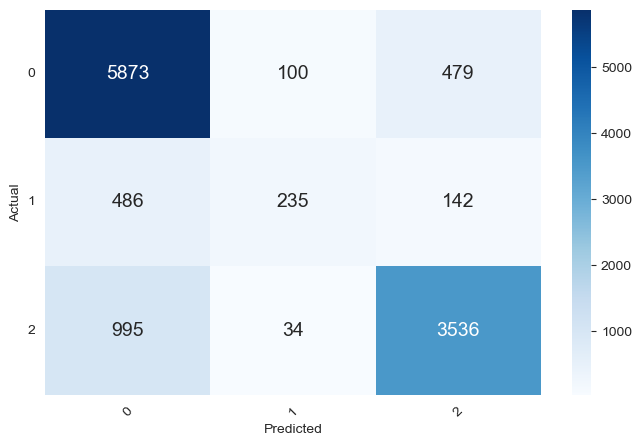

In [120]:
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=8, n_estimators=150, random_state=42, warm_start=True)

if sw_rf:

    cv = KFold(n_splits=10, shuffle = True,  random_state=1)
    
    #fit and predict
    rf.fit(X_train, y_train)
    pred= rf.predict(X_test)
    pred_train = rf.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    cv_score = mean(n_scores)

    rf_acc = round(cv_score*100, 2)
    rf_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9243

Accuracy score (test): 0.8145

Precision score (train): 0.9252

Precision score (test): 0.8092

Recall score (train): 0.9243

Recall score (test): 0.8145

F1 score (train): 0.9212

F1 score (test): 0.8042

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.27      0.38       863
           2       0.85      0.78      0.82      4565

    accuracy                           0.81     11880

   macro avg       0.76      0.66      0.68     11880

weighted avg       0.81      0.81      0.80     11880

### XGBoost

BrendaLoznik's solution extended with our parameters tuning

In [121]:
# # Parameter tuning
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# param_grid = { 
#     'n_estimators': [50, 100, 200],
#     'colsample_bytree' :[ 0.3, 0.4, 0.5],
#     'eta': [0.15, 0.2, 0.3],
#     'max_depth': [10, 11, 12, 13, 14, 15]
#     }

# #Create a based model
# xgb = XGBClassifier( random_state=42)

# grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

# #fitmodel
# grid_search_xgb.fit(X_train, y_train,  eval_metric = 'mlogloss',)

# #print best parameters 
# print('Best Score:', grid_search_xgb.best_score_)
# print('Parameters:', grid_search_xgb.best_params_)
# print('Best Model:', grid_search_xgb.best_estimator_)

Best Score: 0.8132495737302167

Parameters: {'colsample_bytree': 0.3, 'eta': 0.15, 'max_depth': 12, 'n_estimators': 100}

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy score (train): 0.9255
Accuracy score (test): 0.8093
Precision score (train): 0.9277
Precision score (test): 0.8043
Recall score (train): 0.9255
Recall score (test): 0.8093
F1 score (train): 0.9232
F1 score (test): 0.7980
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.63      0.25      0.36       863
           2       0.85      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.80      0.81      0.80     11880



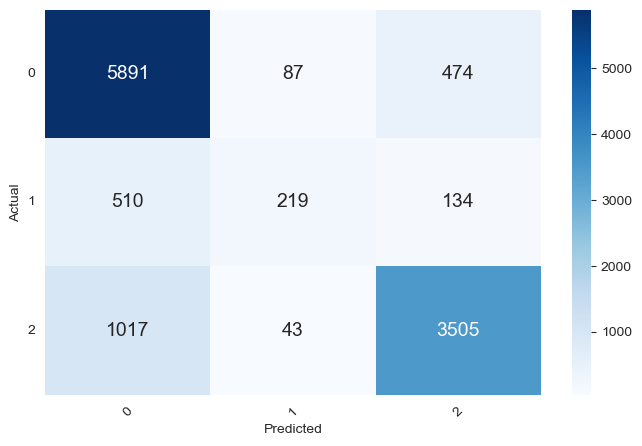

In [122]:
xgb = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 42)

if sw_xgb:

    #fit and predict
    xgb.fit(X_train, y_train)
    pred= xgb.predict(X_test)
    pred_train = xgb.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    xgb_acc = round(accuracy_test*100, 2)
    xgb_f1 = round(f1_test*100, 2)

    #0.8103495737302167

Accuracy score (train): 0.9322

Accuracy score (test): 0.8132

Precision score (train): 0.9338

Precision score (test): 0.8087

Recall score (train): 0.9322

Recall score (test): 0.8132

F1 score (train): 0.9304

F1 score (test): 0.8027

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.63      0.27      0.38       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.81     11880

   macro avg       0.76      0.65      0.68     11880

weighted avg       0.81      0.81      0.80     11880

### CatBoost

Performed by BrendaLoznik with the following results:
- `rsm`: 0.2
- `max_depth`: '9'
- `iterations`: 1000

Learning rate set to 0.096348
0:	learn: 1.0280782	total: 73.1ms	remaining: 1m 13s
1:	learn: 0.9684638	total: 84.2ms	remaining: 42s
2:	learn: 0.9214428	total: 93ms	remaining: 30.9s
3:	learn: 0.8861564	total: 102ms	remaining: 25.3s
4:	learn: 0.8518173	total: 114ms	remaining: 22.7s
5:	learn: 0.8251527	total: 123ms	remaining: 20.3s
6:	learn: 0.7990563	total: 131ms	remaining: 18.6s
7:	learn: 0.7775904	total: 140ms	remaining: 17.3s
8:	learn: 0.7590371	total: 147ms	remaining: 16.2s
9:	learn: 0.7423367	total: 155ms	remaining: 15.4s
10:	learn: 0.7272776	total: 166ms	remaining: 14.9s
11:	learn: 0.7145868	total: 199ms	remaining: 16.4s
12:	learn: 0.7036520	total: 208ms	remaining: 15.8s
13:	learn: 0.6940148	total: 222ms	remaining: 15.6s
14:	learn: 0.6855578	total: 230ms	remaining: 15.1s
15:	learn: 0.6768659	total: 238ms	remaining: 14.6s
16:	learn: 0.6687687	total: 247ms	remaining: 14.3s
17:	learn: 0.6622002	total: 256ms	remaining: 14s
18:	learn: 0.6564793	total: 265ms	remaining: 13.7s
19:	learn: 0.

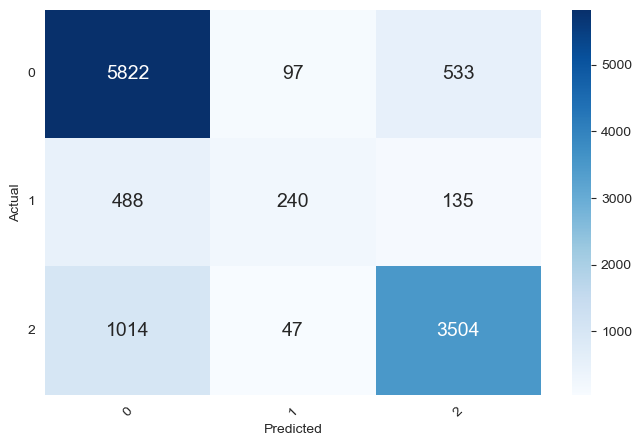

In [123]:
cat = CatBoostClassifier(rsm=0.2, max_depth=9, iterations=1000, random_state=42)

if sw_cat:

    #fit and predict
    cat.fit(X_train, y_train)
    pred= cat.predict(X_test)
    pred_train = cat.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    cat_acc = round(accuracy_test*100, 2)
    cat_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.8889

Accuracy score (test): 0.8071

Precision score (train): 0.8904

Precision score (test): 0.8019

Recall score (train): 0.8889

Recall score (test): 0.8071

F1 score (train): 0.8855

F1 score (test): 0.7976

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.62      0.29      0.40       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.81     11880

   macro avg       0.75      0.65      0.68     11880

weighted avg       0.80      0.81      0.80     11880

### Bagging Classifier

Performed by BrendaLoznik with the following results:
- `n_estimators`: 1000
- `max_features`: '0.4'

Accuracy score (train): 0.9940
Accuracy score (test): 0.8048
Precision score (train): 0.9940
Precision score (test): 0.7992
Recall score (train): 0.9940
Recall score (test): 0.8048
F1 score (train): 0.9939
F1 score (test): 0.7939
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6452
           1       0.61      0.26      0.36       863
           2       0.84      0.77      0.80      4565

    accuracy                           0.80     11880
   macro avg       0.75      0.64      0.67     11880
weighted avg       0.80      0.80      0.79     11880



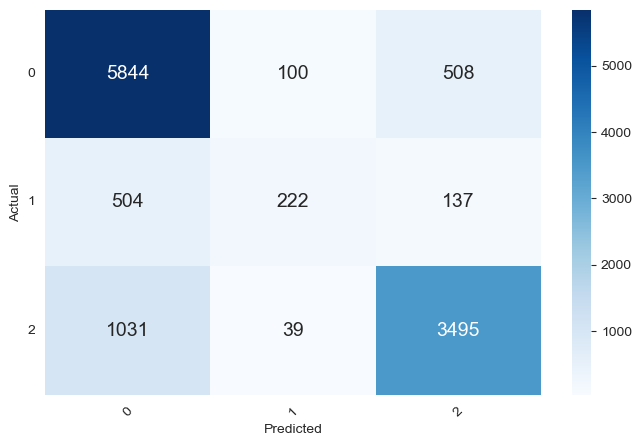

In [124]:
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4)

if sw_bag:

    #fit and predict
    bag.fit(X_train, y_train)
    pred= bag.predict(X_test)
    pred_train = bag.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    bag_acc = round(accuracy_test*100, 2)
    bag_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9959

Accuracy score (test): 0.8104

Precision score (train): 0.9959

Precision score (test): 0.8047

Recall score (train): 0.9959

Recall score (test): 0.8104

F1 score (train): 0.9959

F1 score (test): 0.8006

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6452
           1       0.62      0.28      0.38       863
           2       0.85      0.78      0.81      4565

    accuracy                           0.81     11880

   macro avg       0.76      0.65      0.68     11880

weighted avg       0.80      0.81      0.80     11880

### Weighted vote

Solution by BrendaLoznik extended with our parameter tuning

In [125]:
# rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
# xgb = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42) 
# cat = CatBoostClassifier(max_depth = 9, rsm = 0.2, iterations = 1000, random_state = 42)
# bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=42) 

In [126]:
# Hyperparameter tuning

# import random

# # Create training and test sets: test size 0.2
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# best_weights = [0, 0, 0, 0]
# best_acc = 0.0

# i = 0

# while True:
#     i+=1

#     w = [round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3)]

#     vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = w)         

#     #fit and predict
#     vc.fit(X_train , y_train)
#     pred= vc .predict(X_test)
#     pred_train = vc .predict(X_train)

#     acc = accuracy_score(y_test, pred)

#     #print best model scores on test data
#     print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
#     print("Accuracy score test: {}".format(acc))
#     print("Weights:", w)

#     if acc > best_acc:
#         best_acc = acc
#         best_weights = w

#     print("Best weights:", best_weights, "with result:", best_acc)

#     # open the file in write mode
#     with open('output.txt', 'a') as f:
#         # print best model scores on test data to file
#         f.write("\nIteration: {}\n".format(i))
#         f.write("Accuracy score train: {}\n".format(accuracy_score(y_train, pred_train)))
#         f.write("Accuracy score test: {}\n".format(acc))
#         f.write("Weights: {}\n".format(w))
#         f.write("Best weights: {} with result: {}\n".format(best_weights, best_acc))


# # Best weights: [0.861, 0.78, 0.706, 0.751] with 

Best Score: 0.8175925925925925

Best Weights: [0.861, 0.78, 0.706, 0.751]

Best result out of 211 iterations.

Learning rate set to 0.096348
0:	learn: 1.0280782	total: 9.17ms	remaining: 9.16s
1:	learn: 0.9684638	total: 19.5ms	remaining: 9.74s
2:	learn: 0.9214428	total: 28.1ms	remaining: 9.34s
3:	learn: 0.8861564	total: 36.6ms	remaining: 9.11s
4:	learn: 0.8518173	total: 49ms	remaining: 9.75s
5:	learn: 0.8251527	total: 66.8ms	remaining: 11.1s
6:	learn: 0.7990563	total: 75.1ms	remaining: 10.7s
7:	learn: 0.7775904	total: 84.4ms	remaining: 10.5s
8:	learn: 0.7590371	total: 92.1ms	remaining: 10.1s
9:	learn: 0.7423367	total: 102ms	remaining: 10.1s
10:	learn: 0.7272776	total: 111ms	remaining: 9.96s
11:	learn: 0.7145868	total: 122ms	remaining: 10s
12:	learn: 0.7036520	total: 131ms	remaining: 9.93s
13:	learn: 0.6940148	total: 139ms	remaining: 9.77s
14:	learn: 0.6855578	total: 148ms	remaining: 9.7s
15:	learn: 0.6768659	total: 155ms	remaining: 9.55s
16:	learn: 0.6687687	total: 164ms	remaining: 9.49s
17:	learn: 0.6622002	total: 174ms	remaining: 9.47s
18:	learn: 0.6564793	total: 183ms	remaining: 9.43s
19:	lea

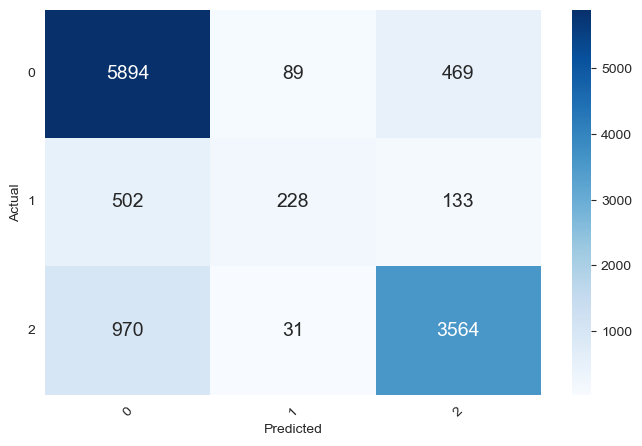

In [127]:
if sw_weight:

    # Create training and test sets: test size 0.2
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

    vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.861, 0.78, 0.706, 0.751])
    # vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])

    #fit and predict
    vc.fit(X_train , y_train)
    pred= vc .predict(X_test)
    pred_train = vc .predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    weight_acc = round(accuracy_test*100, 2)
    weight_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9610

Accuracy score (test): 0.8175

Precision score (train): 0.9617

Precision score (test): 0.8129

Recall score (train): 0.9610

Recall score (test): 0.8175

F1 score (train): 0.9604

F1 score (test): 0.8075

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6452
           1       0.65      0.28      0.39       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880

   macro avg       0.77      0.66      0.69     11880
   
weighted avg       0.81      0.82      0.81     11880

### Stacking

Solution by BrendaLoznik

Learning rate set to 0.096348
0:	learn: 1.0280782	total: 13.5ms	remaining: 13.5s
1:	learn: 0.9684638	total: 24.2ms	remaining: 12.1s
2:	learn: 0.9214428	total: 47.1ms	remaining: 15.7s
3:	learn: 0.8861564	total: 57ms	remaining: 14.2s
4:	learn: 0.8518173	total: 68.9ms	remaining: 13.7s
5:	learn: 0.8251527	total: 78.9ms	remaining: 13.1s
6:	learn: 0.7990563	total: 87ms	remaining: 12.3s
7:	learn: 0.7775904	total: 97.2ms	remaining: 12s
8:	learn: 0.7590371	total: 105ms	remaining: 11.6s
9:	learn: 0.7423367	total: 117ms	remaining: 11.5s
10:	learn: 0.7272776	total: 126ms	remaining: 11.3s
11:	learn: 0.7145868	total: 136ms	remaining: 11.2s
12:	learn: 0.7036520	total: 145ms	remaining: 11s
13:	learn: 0.6940148	total: 154ms	remaining: 10.8s
14:	learn: 0.6855578	total: 163ms	remaining: 10.7s
15:	learn: 0.6768659	total: 184ms	remaining: 11.3s
16:	learn: 0.6687687	total: 193ms	remaining: 11.2s
17:	learn: 0.6622002	total: 204ms	remaining: 11.1s
18:	learn: 0.6564793	total: 215ms	remaining: 11.1s
19:	learn: 

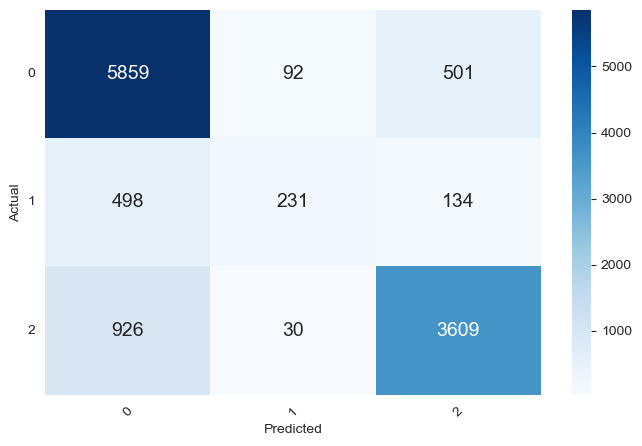

In [128]:
if sw_stack:

    # Create training and test sets: test size 0.2
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


    stack = StackingClassifier(
        estimators=[('rf', rf), ('xgb', xgb), ('cat', cat), ('bag', bag)],
        final_estimator=LogisticRegression()
        )

    #fit and predict
    stack.fit(X_train, y_train)
    pred= stack.predict(X_test)
    pred_train = stack.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    stack_acc = round(accuracy_test*100, 2)
    stack_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9518

Accuracy score (test): 0.8173

Precision score (train): 0.9525

Precision score (test): 0.8118

Recall score (train): 0.9518

Recall score (test): 0.8173

F1 score (train): 0.9508

F1 score (test): 0.8070

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.85      0.79      0.82      4565

    accuracy                           0.82     11880

   macro avg       0.77      0.66      0.69     11880

weighted avg       0.81      0.82      0.81     11880

## New models

### 11 XGBoost Ensemble

Accuracy score (train): 0.9270
Accuracy score (test): 0.8113
Precision score (train): 0.9289
Precision score (test): 0.8071
Recall score (train): 0.9270
Recall score (test): 0.8113
F1 score (train): 0.9245
F1 score (test): 0.7995
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6452
           1       0.64      0.25      0.36       863
           2       0.86      0.77      0.81      4565

    accuracy                           0.81     11880
   macro avg       0.76      0.64      0.67     11880
weighted avg       0.81      0.81      0.80     11880



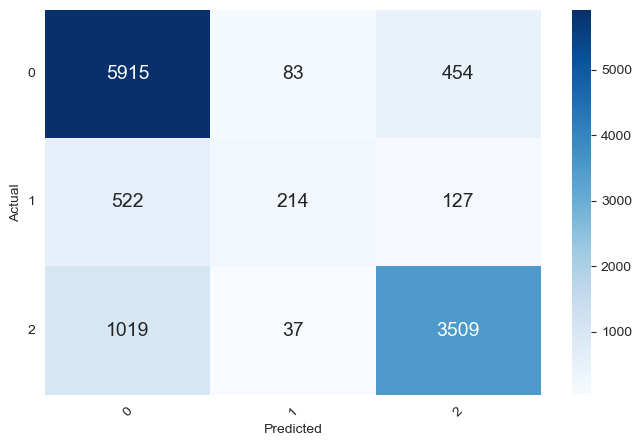

In [129]:
if sw_xgb_ens:

    # Best performing model - ensembled
    xgb1 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 42)
    xgb2 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 2) 
    xgb3 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 142) 
    xgb4 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 33 )
    xgb5 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 678)
    xgb6 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 53)
    xgb7 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 23)
    xgb8 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 63)
    xgb9 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 342)
    xgb10 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 634)
    xgb11 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 5)

    # Create training and test sets: test size 0.2
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

    vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5), ('xgb6', xgb6), ('xgb7', xgb7), ('xgb8', xgb8), ('xgb9', xgb9), ('xgb10', xgb10), ('xgb11', xgb11)], voting = 'soft')       

    #fit and predict
    vc.fit(X_train , y_train)
    pred= vc .predict(X_test)
    pred_train = vc .predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))

    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    xgb_ens_acc = round(accuracy_test*100, 2)
    xgb_ens_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.9305

Accuracy score (test): 0.8152

Precision score (train): 0.9323

Precision score (test): 0.8115

Recall score (train): 0.9305

Recall score (test): 0.8152

F1 score (train): 0.9284

F1 score (test): 0.8044

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880

   macro avg       0.77      0.65      0.68     11880

weighted avg       0.81      0.82      0.80     11880

### Light GBM

In [130]:
# Hyperparameter tuning
# param_grid_lgbm = {
#     'max_depth': [7, 8, 9],
#     'num_iterations': [1000, 750],
#     'bagging_fraction': [0.3, 0.2]
# }

# lgbm = LGBMClassifier(random_state=42)
# grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, verbose=2, scoring='accuracy')
# grid_search_lgbm.fit(X_train, y_train)

# print('LightGBM - Best Score:', grid_search_lgbm.best_score_)
# print('LightGBM - Best Parameters:', grid_search_lgbm.best_params_)
# print('LightGBM - Best Model:', grid_search_lgbm.best_estimator_)
# print()

Best Score: 0.8018

Best Parameters: {'bagging_fraction': 0.3, 'max_depth': 9, 'num_iterations': 1000}

Best Model: GradientBoostingClassifier(bagging_fraction=0.3, max_depth=9, num_iterations=1000, random_state=42)

In [131]:
if sw_lgbm:

    # Best performing model
    lgbm = LGBMClassifier(max_depth=9, n_estimators=1000, learning_rate=0.01, random_state=42)

    #fit and predict
    lgbm.fit(X_train , y_train)
    pred= lgbm .predict(X_test)
    pred_train = lgbm .predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    lgbm_acc = round(accuracy_test*100, 2)
    lgbm_f1 = round(f1_test*100, 2)

NameError: name 'LGBMClassifier' is not defined

### Gradient Boosting

In [ ]:
# Hyperparameter tuning
# param_grid_gb = {
#     'max_depth': [7, 8, 9],
#     'n_estimators': [1000, 750],
#     'learning_rate': [0.1, 0.01]
# }

# gb = GradientBoostingClassifier(random_state=42)
# grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, verbose=2, scoring='accuracy')
# grid_search_gb.fit(X_train, y_train)

# print('Gradient Boosting - Best Score:', grid_search_gb.best_score_)
# print('Gradient Boosting - Best Parameters:', grid_search_gb.best_params_)
# print('Gradient Boosting - Best Model:', grid_search_gb.best_estimator_)
# print()

Best Score: 0.8030682850108294

Best Parameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000}

Best Model: GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1000, random_state=42)

In [ ]:
gb = GradientBoostingClassifier(max_depth=9, n_estimators=1000, learning_rate=0.01, random_state=42)

if sw_gb:

    #fit and predict
    gb.fit(X_train, y_train)
    pred= gb.predict(X_test)
    pred_train = gb.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    gb_acc = round(accuracy_test*100, 2)
    gb_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.8953

Accuracy score (test): 0.8033

Precision score (train): 0.8994

Precision score (test): 0.7987

Recall score (train): 0.8953

Recall score (test): 0.8033

F1 score (train): 0.8912

F1 score (test): 0.7922

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6452
           1       0.61      0.26      0.36       863
           2       0.85      0.75      0.80      4565

    accuracy                           0.80     11880

   macro avg       0.75      0.64      0.67     11880

weighted avg       0.80      0.80      0.79     11880

### AdaBoost

In [ ]:
# Hyperparameter tuning
# param_grid_ada = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# ada = AdaBoostClassifier(random_state=42)
# grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, verbose=2, scoring='accuracy')
# grid_search_ada.fit(X_train, y_train)

# print('AdaBoost - Best Score:', grid_search_ada.best_score_)
# print('AdaBoost - Best Parameters:', grid_search_ada.best_params_)
# print('AdaBoost - Best Model:', grid_search_ada.best_estimator_)
# print()

Best Score: 0.7343167659087632

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}

Best Model: AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=42)

In [ ]:
ada = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)

if sw_ada:

    #fit and predict
    ada.fit(X_train , y_train)
    pred= ada.predict(X_test)
    pred_train = ada.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    ada_acc = round(accuracy_test*100, 2)
    ada_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.7360

Accuracy score (test): 0.7355

Precision score (train): 0.7318

Precision score (test): 0.7245

Recall score (train): 0.7360

Recall score (test): 0.7355

F1 score (train): 0.7049

F1 score (test): 0.7046

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      6452
           1       0.46      0.02      0.03       863
           2       0.79      0.63      0.70      4565

    accuracy                           0.74     11880

   macro avg       0.66      0.52      0.51     11880

weighted avg       0.72      0.74      0.70     11880

### Extra Trees

In [ ]:
# Hyperparameter tuning
# param_grid_etc = {
#     'max_depth': [7, 8, 9],
#     'n_estimators': [100, 200, 300],
#     'min_samples_split': [2, 4, 6]
# }

# etc = ExtraTreesClassifier(random_state=42)
# grid_search_etc = GridSearchCV(estimator=etc, param_grid=param_grid_etc, cv=5, verbose=2, scoring='accuracy')
# grid_search_etc.fit(X_train, y_train)

# print('Extra Trees Classifier - Best Score:', grid_search_etc.best_score_)
# print('Extra Trees Classifier - Best Parameters:', grid_search_etc.best_params_)
# print('Extra Trees Classifier - Best Model:', grid_search_etc.best_estimator_)
# print()

Best Score: 0.7503104017125904

Best Parameters: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 200}

Best Model: ExtraTreesClassifier(max_depth=9, min_samples_split=4, n_estimators=200,
                     random_state=42)

In [ ]:
etc = ExtraTreesClassifier(max_depth=9, n_estimators=200, min_samples_split=4, random_state=42)

if sw_etc:

    #fit and predict
    etc.fit(X_train, y_train)
    pred= etc.predict(X_test)
    pred_train = etc.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    etc_acc = round(accuracy_test*100, 2)
    etc_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.7544

Accuracy score (test): 0.7503

Precision score (train): 0.7671

Precision score (test): 0.7620

Recall score (train): 0.7544

Recall score (test): 0.7503

F1 score (train): 0.7220

F1 score (test): 0.7176

              precision    recall  f1-score   support

           0       0.72      0.94      0.81      6452
           1       0.71      0.01      0.02       863
           2       0.84      0.63      0.72      4565

    accuracy                           0.75     11880

   macro avg       0.76      0.52      0.52     11880

weighted avg       0.76      0.75      0.72     11880

### Artificial Neural Networks

In [ ]:
# Hyperparameter tuning
# param_grid_nn = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate': ['constant', 'adaptive']
# }

# nn = MLPClassifier(random_state=42)
# grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, verbose=2, scoring='accuracy')
# grid_search_nn.fit(X_train, y_train)

# print('Neural Networks - Best Score:', grid_search_nn.best_score_)
# print('Neural Networks - Best Parameters:', grid_search_nn.best_params_)
# print('Neural Networks - Best Model:', grid_search_nn.best_estimator_)
# print()

Best Score: 0.7349692490338866

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Best Model: MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', learning_rate='constant', random_state=42)

if sw_nn:

    #fit and predict
    nn.fit(X_train, y_train)
    pred= nn.predict(X_test)
    pred_train = nn.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    nn_acc = round(accuracy_test*100, 2)
    nn_f1 = round(f1_test*100, 2)

Accuracy score (train): 0.7541

Accuracy score (test): 0.7465

Precision score (train): 0.7502

Precision score (test): 0.7330

Recall score (train): 0.7541

Recall score (test): 0.7465

F1 score (train): 0.7250

F1 score (test): 0.7167

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6452
           1       0.46      0.02      0.03       863
           2       0.80      0.66      0.72      4565

    accuracy                           0.75     11880

   macro avg       0.66      0.53      0.52     11880

weighted avg       0.73      0.75      0.72     11880

### Weighted Vote of the best found models

In [ ]:
# vc = VotingClassifier([MODELS], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])
# vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.861, 0.78, 0.706, 0.751])

if sw_fin_weight:

    #fit and predict
    vc.fit(X_train, y_train)
    pred= vc.predict(X_test)
    pred_train = vc.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred)

    # Calculate precision scores
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred, average='weighted')

    # Calculate recall scores
    recall_train = recall_score(y_train, pred_train, average='weighted')
    recall_test = recall_score(y_test, pred, average='weighted')

    # Calculate F1 scores
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred, average='weighted')

    # Print the scores
    print("Accuracy score (train): {:.4f}".format(accuracy_train))
    print("Accuracy score (test): {:.4f}".format(accuracy_test))
    print("Precision score (train): {:.4f}".format(precision_train))
    print("Precision score (test): {:.4f}".format(precision_test))
    print("Recall score (train): {:.4f}".format(recall_train))
    print("Recall score (test): {:.4f}".format(recall_test))
    print("F1 score (train): {:.4f}".format(f1_train))
    print("F1 score (test): {:.4f}".format(f1_test))


    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, pred))

    #heatmap
    fig, ax = plt.subplots(figsize=(8,5)) 
    data = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
    ax.set_xlabel("Predicted")
    ax.set_ylabel ("Actual")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

    fin_weight_acc = round(accuracy_test*100, 2)
    fin_weight_f1 = round(f1_test*100, 2)

## Store results in a file

In [132]:
with open('results.csv', 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=column_names)

    # Fill the row with data
    row_data = {}
    for column in column_names:
        # Assuming the data comes from parameters with the same name
        row_data[column] = globals().get(column, "")

    writer.writerow(row_data)

## Submission to competition

Make sure `sw_gps_height_model_imput` was set to `False` for the entire execution, as it is against the competition rules to use external data for imputation.

In [ ]:
test_set.describe()

,component1,component2,component3,component4,component5,component6,component7,component8,id
count,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,108.601492,0.454184,-0.733355,2.039389,-1.019188,0.181152,-0.032348,-0.108824,37161.972929
std,41.304986,35.973683,32.821913,8.164652,4.772602,4.379267,2.872580,2.247636,21359.364833
min,23.007397,-87.761690,-72.622685,-20.506626,-11.561595,-9.623770,-6.573116,-7.650351,10.000000
25%,79.715089,-26.393042,-27.020636,-3.983041,-4.793088,-2.868760,-2.014858,-1.695221,18727.000000
50%,110.816730,-1.048588,-0.284377,2.426334,-1.397695,-0.820151,-0.772916,0.048184,37361.500000
75%,138.247903,24.586629,17.731289,7.916337,2.492627,2.717248,2.102038,1.465468,55799.750000
max,223.422138,116.532058,87.257337,22.798172,14.918685,15.801485,9.960681,7.441989,74249.000000


In [135]:
if sw_gen_comp_file:

    # Select the model to submit
    model = vc

    #fit on foll training set
    model.fit(X , y)

    #predict
    submission = test_set.drop(['id', 'status_group'], axis=1)
    submission['status_group'] = model.predict(submission)

    #bring the id column back
    submission['id'] = test_set['id']

    #create df for submission and save
    best_submission = submission[['id', 'status_group']]

    best_submission['status_group'] = encoder.inverse_transform(best_submission['status_group'])

    best_submission.to_csv('best_submission.csv', index=False)

/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_23830/781767202.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_submission['status_group'] = encoder.inverse_transform(best_submission['status_group'])


# Research Questions

In [ ]:
# train_df = pd.read_csv("final_df_copy.csv")

# full_df = pd.read_csv("preselection_noencoding_df_copy.csv").drop('Unnamed: 0', axis=1)

train_base_df = pd.read_csv("project/data/train/features.csv", parse_dates = ['date_recorded' ],  na_values = [0, '0'])
labels = pd.read_csv("project/data/train/labels.csv")
original_df = pd.merge(labels, train_base_df, on='id')

## 1. What are the main factors associated with pump failure or malfunction, and how do these vary across different regions of Tanzania?

In [ ]:
train_df['region'] = full_df['region']
train_df['region'].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam', nan], dtype=object)

In [ ]:
#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

for region in train_df['region'].unique():

    df = train_df[train_df['region'] == region].drop('region', axis=1)

    #define train and test 
    train_set = df[df['status_group'].notna()]
    test_set = df[df['status_group'].isna()]

    #define X and y varaibles
    X = train_set.drop(['status_group', 'id'],axis=1)
    y = train_set['status_group']

    #perform cross-validaton
    n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

    #plot feature importance
    feature_importances(rf, " for "+region+" region")

KeyboardInterrupt: 

In [ ]:
distribution_checker(original_df, 'region')#.sort_values('nr_pumps', ascending=False)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
region,,,,,
Arusha,3350,5.6,68.5,26.3,5.2
Dar es Salaam,805,1.4,57.3,42.4,0.4
Dodoma,2201,3.7,45.8,44.7,9.5
Iringa,5294,8.9,78.2,19.5,2.3
Kagera,3316,5.6,52.1,38.8,9.2
Kigoma,2816,4.7,48.4,30.2,21.4
Kilimanjaro,4379,7.4,60.3,32.4,7.4
Lindi,1546,2.6,29.8,64.2,6.0
Manyara,1583,2.7,62.3,31.6,6.1


### Question 1 Conclusion

- Iringa: **`quantity`** >.3 `longitude` >.1 - `quantity`: enough water in most pumps (>80%). Iringa has very high functionality.
- Mara: `age`, `longitude` >.1
- Manyara: `quantity`, `population` >.1
- Mtwara: `quantity` >.1
- Kagera: `quantity`, `longitude`, `pump_density`, `latitude` >.1
- Tanga: `longitude`, `pump_density`, `latitude` >.1
- Shinyanga: `quantity`, `latitude` >.1
- Tabora: `quantity`, `longitude`, `pump_density` >.1
- Pwani: **`funder`**, `age` >.1 - `funder`: most pumps funded by private individual, and these have 90% functionaloty rate
- Ruvuma: **`quantity`** >.3 `longitude` >.1 - `quantity`: two times more dry pumps than usual
- Kilimanjaro: `longitude`, `population`, `age` >.1
- Rukwa: `population` >.1
- Mwanza: `longitude` >.1
- Kigoma: `longitude`, `pump_density` >.1
- Lindi: none >.1
- Dodoma: **`quantity`** >.3 `longitude`, `latitude`, `pump_density` >.1 - `quantity`: same as Ruvuma
- Arusha: `longitude`, `pump_density` >.1
- Mbeya: `longitude`, `pump_density`, `quantity`, `latitude` >.1
- Singida: `age`, `quantity` >.1
- Morogoro none >.1
- Salaam: `quantity`, `waterpoint_type` >.1

Geographic features seem to be important in general (even within separate regions). 'Population' and 'age' also appeared frequently on the top/

## 2. Which operators and/or management groups have the highest success rates in maintaining water pumps, and how do these rates vary based on factors which may make pump maintenance easier, such as water cost, pump type, or location remoteness?

In [ ]:
distribution_checker(original_df, 'scheme_management')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
scheme_management,,,,,
Company,1061,1.9,50.3,46.2,3.5
None,1,0.0,100.0,0.0,0.0
Other,766,1.4,59.8,37.3,2.9
Parastatal,1680,3.0,57.5,30.5,12.0
Private operator,1063,1.9,68.6,29.3,2.2
SWC,97,0.2,20.6,78.4,1.0
Trust,72,0.1,63.9,29.2,6.9
VWC,36792,66.3,51.5,42.1,6.3
WUA,2883,5.2,69.2,22.5,8.3


In [ ]:
bad_list = ['SWC', 'Company']
good_list = ['Water Board', 'WUA', 'Private operator', 'Trust']

Accuracy: 0.771 (0.035)


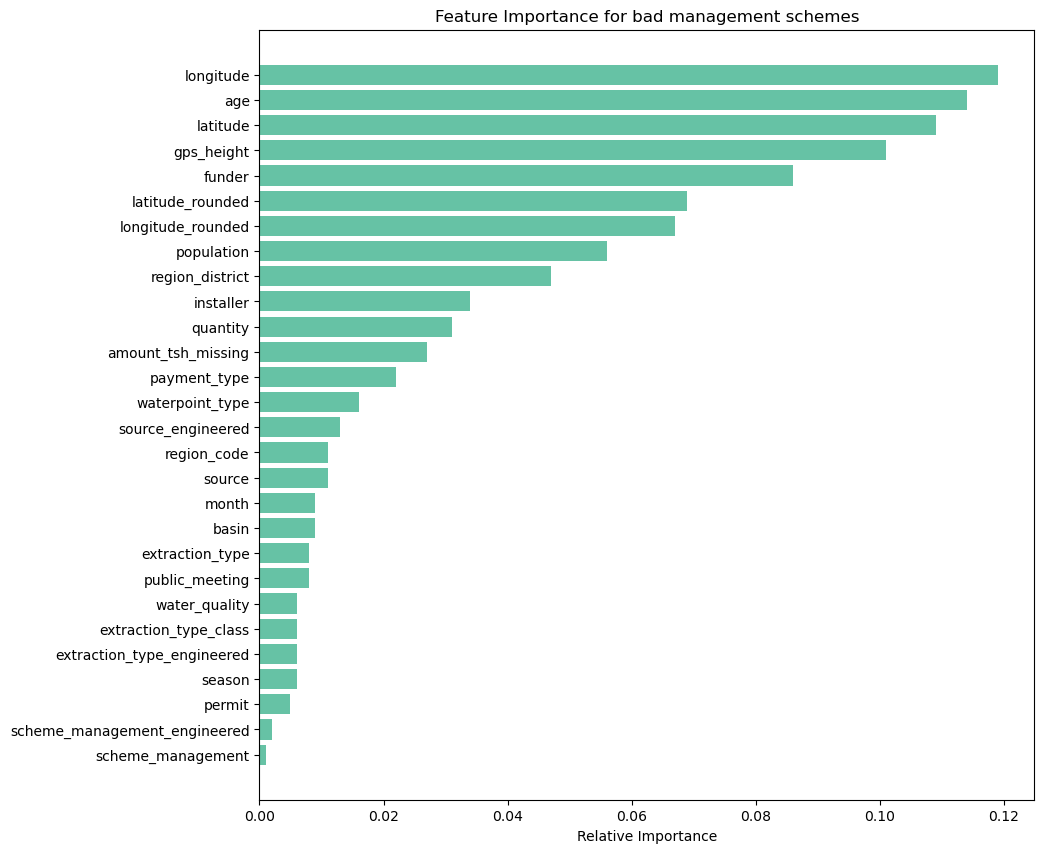

In [ ]:
# Check feature importance for the bad list

train_df = train_df.drop('region', axis=1)

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

df = train_df[full_df['scheme_management'].isin(bad_list)]

#define train and test 
train_set = df[df['status_group'].notna()]
test_set = df[df['status_group'].isna()]

#define X and y varaibles
X = train_set.drop(['status_group', 'id'],axis=1)
y = train_set['status_group']

#perform cross-validaton
n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#plot feature importance
feature_importances(rf, " for bad management schemes")

Accuracy: 0.846 (0.014)


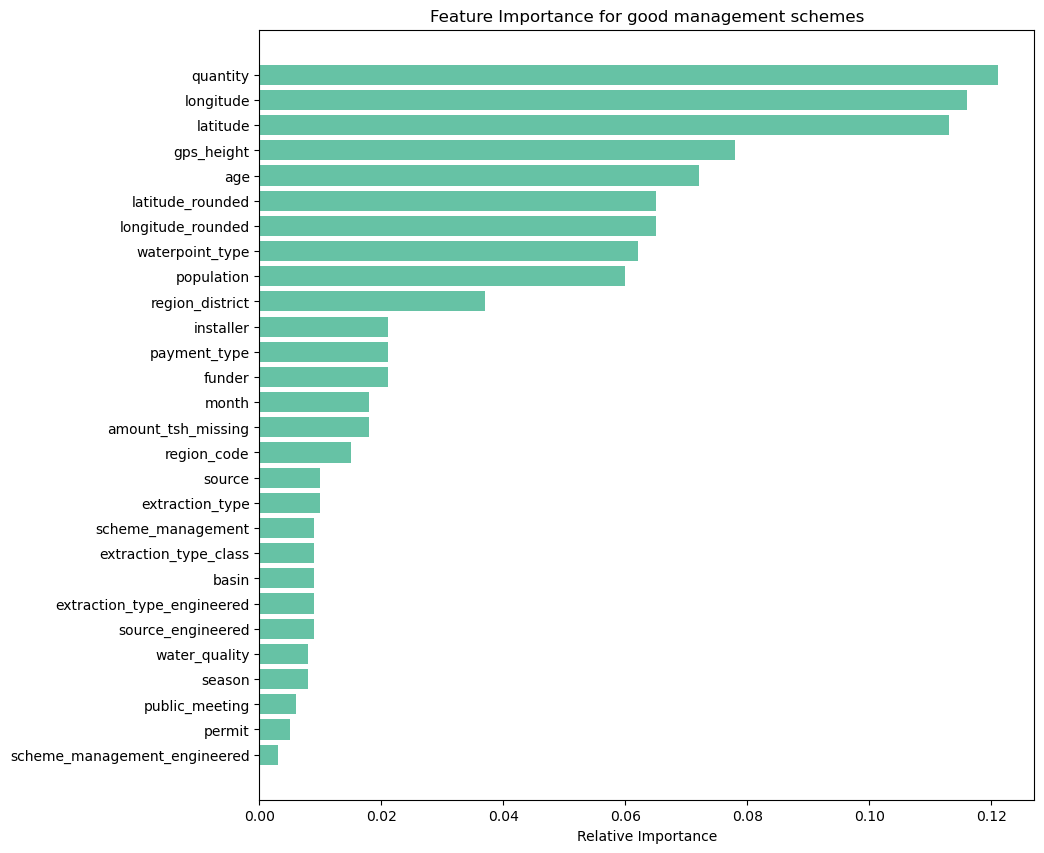

In [ ]:
# Check feature importance for the good list

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

df = train_df[full_df['scheme_management'].isin(good_list)]

#define train and test 
train_set = df[df['status_group'].notna()]
test_set = df[df['status_group'].isna()]

#define X and y varaibles
X = train_set.drop(['status_group', 'id'],axis=1)
y = train_set['status_group']

#perform cross-validaton
n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#plot feature importance
feature_importances(rf, " for good management schemes")

In [ ]:
# Water quantity distribution for list of good management schemes
private = original_df[original_df['scheme_management'].isin(good_list)]
private_extraction = private.groupby('quantity')['id'].count().reset_index()
private_extraction['total_pumps'] =private_extraction['id'].sum()
private_extraction['percentage'] = round((private_extraction['id']/ private_extraction['total_pumps'])*100,1)
private_extraction = private_extraction.sort_values('percentage', ascending = False)
private_extraction = private_extraction.drop(['id', 'total_pumps'],axis=1)
private_extraction

,quantity,percentage
1,enough,68.0
2,insufficient,19.0
3,seasonal,6.2
0,dry,6.0
4,unknown,0.9


In [ ]:
distribution_checker(original_df, 'quantity').sort_values('nr_pumps', ascending=False)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
quantity,,,,,
enough,33185,55.9,65.2,27.5,7.2
insufficient,15129,25.5,52.3,38.1,9.6
dry,6246,10.5,2.5,96.9,0.6
seasonal,4050,6.8,57.4,32.3,10.3
unknown,789,1.3,27.0,71.2,1.8


In [ ]:
# Water quantity distribution for list of bad management schemes
vwc = original_df[original_df['scheme_management'].isin(bad_list)]
vwc_extraction = vwc .groupby('quantity')['id'].count().reset_index()
vwc_extraction['total_pumps'] =vwc_extraction['id'].sum()
vwc_extraction['percentage'] = round((vwc_extraction['id']/ vwc_extraction['total_pumps'])*100,1)
vwc_extraction = vwc_extraction.sort_values('percentage', ascending = False)
vwc_extraction = vwc_extraction.drop(['id', 'total_pumps'],axis=1)
vwc_extraction

,quantity,percentage
1,enough,56.2
2,insufficient,37.3
0,dry,4.6
3,seasonal,1.8
4,unknown,0.1


### Question 2 Conclusion

'Water Board', 'WUA', 'Private operator', 'Trust' have the highest functionality

'SWC' has a very large non-functionality (78%), but has only 97 samples
'Company' has second lowest (46%) with 1061 samples

Feature Importance analysis shown that quantity influences the functionality of water pumps with bad management schemes. There are almost twice as much pumps with insufficient quantity among the bad management schemes compared to quantity for good management schemes

## 3. What are the interactions between different features, such as water quantity and pump type, which could provide insights into the underlying causes of pump failure?

In [ ]:
# check pump types with highest failures
distribution_checker(original_df, 'extraction_type_class').sort_values('nr_pumps', ascending=False)

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
extraction_type_class,,,,,
gravity,26780,45.1,59.9,30.0,10.1
handpump,16455,27.7,63.1,30.9,6.0
other,6430,10.8,16.0,80.8,3.2
submersible,6179,10.4,53.9,42.0,4.1
motorpump,2987,5.0,38.0,57.4,4.6
rope pump,451,0.8,65.0,31.3,3.8
wind-powered,117,0.2,42.7,51.3,6.0


In [ ]:
bad_list = ['motorpump', 'other', 'wind-powered']
good_list = ['gravity', 'handpump', 'submersible', 'rope pump']

Accuracy: 0.905 (0.005)


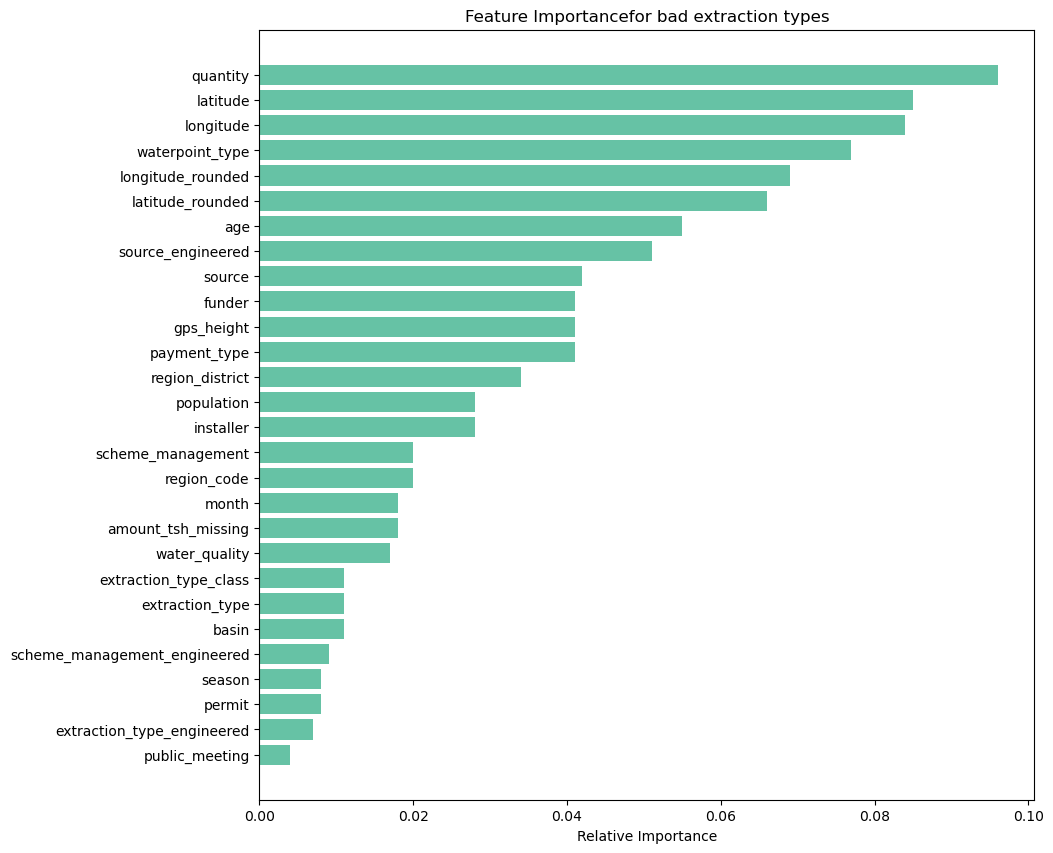

In [ ]:
# Feature Importance for bad extraction types

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

df = train_df[full_df['extraction_type_class'].isin(bad_list)]

#define train and test 
train_set = df[df['status_group'].notna()]
test_set = df[df['status_group'].isna()]

#define X and y varaibles
X = train_set.drop(['status_group', 'id'],axis=1)
y = train_set['status_group']

#perform cross-validaton
n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#plot feature importance
feature_importances(rf, "for bad extraction types")

Accuracy: 0.792 (0.006)


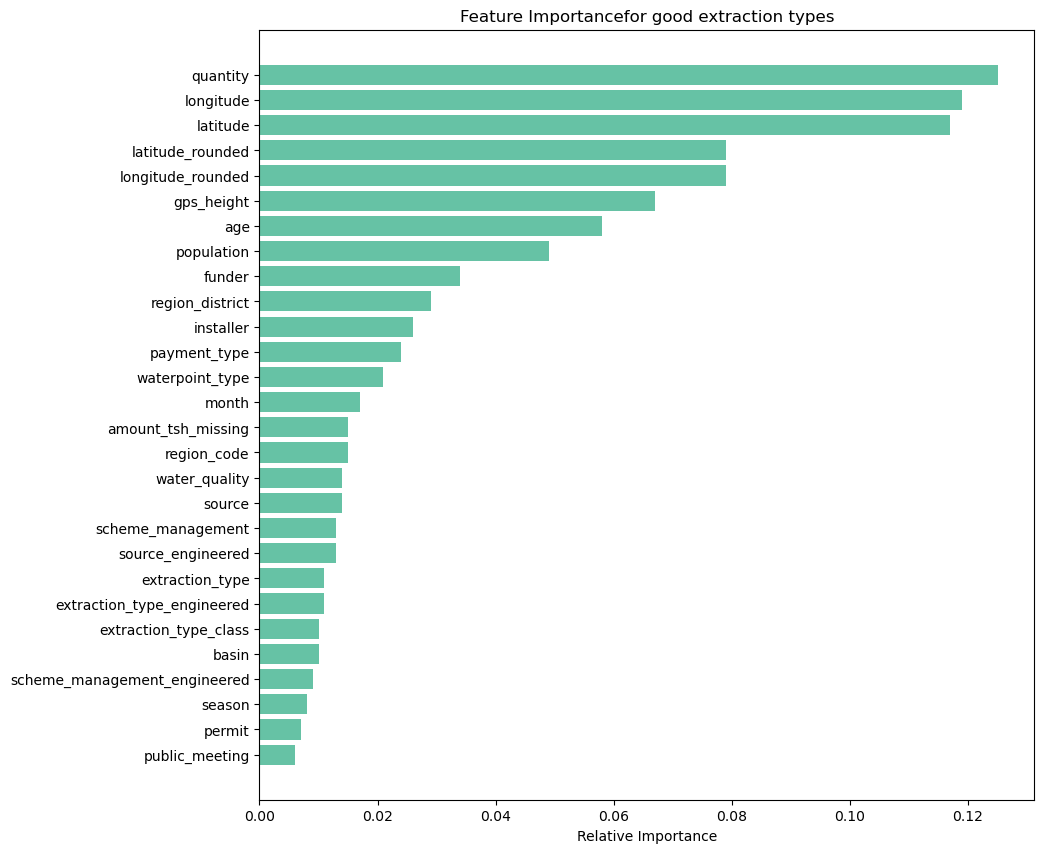

In [ ]:
# Feature Importance for good extraction types

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

df = train_df[full_df['extraction_type_class'].isin(good_list)]

#define train and test 
train_set = df[df['status_group'].notna()]
test_set = df[df['status_group'].isna()]

#define X and y varaibles
X = train_set.drop(['status_group', 'id'],axis=1)
y = train_set['status_group']

#perform cross-validaton
n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#plot feature importance
feature_importances(rf, "for good extraction types")

In [ ]:
# Water quantity distribution for list of good extraction types
private = original_df[original_df['extraction_type_class'].isin(good_list)]
private_extraction = private.groupby('quantity')['id'].count().reset_index()
private_extraction['total_pumps'] =private_extraction['id'].sum()
private_extraction['percentage'] = round((private_extraction['id']/ private_extraction['total_pumps'])*100,1)
private_extraction = private_extraction.sort_values('percentage', ascending = False)
private_extraction = private_extraction.drop(['id', 'total_pumps'],axis=1)
private_extraction

,quantity,percentage
1,enough,58.1
2,insufficient,25.7
0,dry,8.0
3,seasonal,7.0
4,unknown,1.1


In [ ]:
# Water quantity distribution for list of bad extraction types
vwc = original_df[original_df['extraction_type_class'].isin(bad_list)]
vwc_extraction = vwc .groupby('quantity')['id'].count().reset_index()
vwc_extraction['total_pumps'] =vwc_extraction['id'].sum()
vwc_extraction['percentage'] = round((vwc_extraction['id']/ vwc_extraction['total_pumps'])*100,1)
vwc_extraction = vwc_extraction.sort_values('percentage', ascending = False)
vwc_extraction = vwc_extraction.drop(['id', 'total_pumps'],axis=1)
vwc_extraction

,quantity,percentage
1,enough,44.0
2,insufficient,24.5
0,dry,23.4
3,seasonal,5.7
4,unknown,2.4


In [ ]:
# Feature importance by population bin

#instantiate model and cross_validation
rf = RandomForestClassifier(random_state =42)
cv = KFold(n_splits=10, shuffle = True,  random_state=1)

for pop in full_df['population_engineered'].unique():

    df = train_df[full_df['population_engineered'] == pop]

    #define train and test 
    train_set = df[df['status_group'].notna()]
    test_set = df[df['status_group'].isna()]

    #define X and y varaibles
    X = train_set.drop(['status_group', 'id'],axis=1)
    y = train_set['status_group']

    #perform cross-validaton
    n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

    #plot feature importance
    feature_importances(rf, " for "+pop+" population")

KeyError: 'population_engineered'

### Question 3 conclusion

most of labelled types have good functionality rate except for "motorpumps". "wind-powered" not great, but there are just 117 of them. "other" pumps are terrible and there make 10% of all pumps

This issue also comes down to water `quantity`. It seems like the feature that has the most important feature making extraction types perform badly are dry pumps. Extraction types with good functionality have 58% 'enough' `quantity` and 8% 'dry' `quantity`, while the ones with bad functionality have 44% 'enough' `quantity` and 23.4% 'dry' `quantity`.

## 4. How does the age of a water pump relate to its functionality, and is there a point at which pumps become significantly more likely to break down or require replacement?

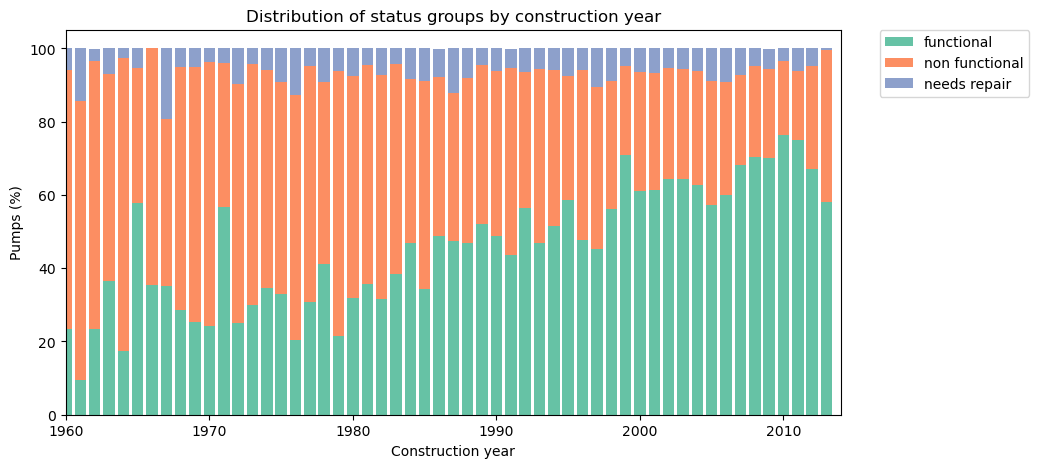

In [ ]:
#import data
train_labels = pd.read_csv('project/data/train/labels.csv')
train_values = pd.read_csv('project/data/train/features.csv', parse_dates = ['date_recorded' ])
test_values = pd.read_csv('project/data/test/test.csv', parse_dates = ['date_recorded' ])

train= pd.merge(train_labels , train_values, on='id')

raw = pd.concat([train, test_values])
raw.head()

# Distribution of status group by construction year
fig, ax = plt.subplots(figsize=(10,5))
construction = distribution_checker(raw, 'construction_year')
labels = raw['construction_year'].sort_values().unique()
ax.bar(labels, construction['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, construction['perc_non_functional'], label = 'non functional', bottom = construction['perc_functional'] , color = '#fc8e62')
ax.bar(labels, construction['perc_functional_needs_repair'], label = 'needs repair', bottom = construction['perc_functional'] + construction['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by construction year', xlabel = 'Construction year', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([1960,2014])
plt.show()

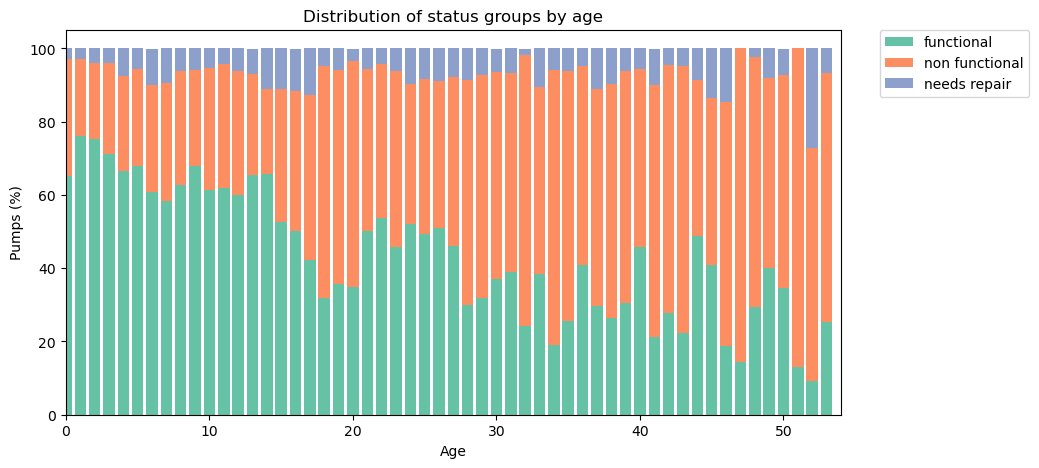

In [ ]:
# Distribution of status group by age
fig, ax = plt.subplots(figsize=(10,5))
construction = distribution_checker(full_df, 'age')
labels = full_df['age'].sort_values().unique()
ax.bar(labels, construction['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, construction['perc_non_functional'], label = 'non functional', bottom = construction['perc_functional'] , color = '#fc8e62')
ax.bar(labels, construction['perc_functional_needs_repair'], label = 'needs repair', bottom = construction['perc_functional'] + construction['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by age', xlabel = 'Age', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 54])
plt.show()

In [ ]:
distribution_checker(full_df, 'age')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
age,,,,,
-7,1,0.0,100.0,0.0,0.0
-5,3,0.0,66.7,33.3,0.0
-4,2,0.0,50.0,50.0,0.0
-3,1,0.0,0.0,100.0,0.0
-2,1,0.0,0.0,100.0,0.0
-1,1,0.0,0.0,100.0,0.0
0,701,1.2,65.3,31.8,2.9
1,2303,3.9,76.2,21.0,2.9
2,2130,3.6,75.2,20.8,4.1


### Question 4 conclusion

There is a pattern. No interesting points in time. It's less clear in the old pumps because there is much less of them.

## 5. What is the most reliable machine learning method for pump failure prediction?

Entire report